In [ ]:
import pandas as pd

In [ ]:
initial_values = {
    'HEB': 9,
    'BEB': 15
}

In [4]:
h_pp = pd.read_csv(r'../../results/highcap-PP-optimized-variables-y.csv', low_memory=False)

# Drop CDBs
h_pp = h_pp.loc[h_pp['Powertrain'] != 'CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
h_pp.loc[(h_pp['Year'] == 0) & (h_pp['Powertrain'] == 'HEB'), 'Value'] = 9
h_pp.loc[(h_pp['Year'] == 0) & (h_pp['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
h_pp['Diff'] = h_pp.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
h_pp['Diff'] = h_pp['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
h_pp['Investment Cost (M$)'] = h_pp.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_h_pp = h_pp.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_h_pp.columns = [f'{col[1]} - {col[0]}' for col in result_h_pp.columns]
result_h_pp

,- Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$)
0,0,15,9,0.0,0.0,0.0,0.0
1,1,23,9,8.0,0.0,10.4,0.0
2,2,23,25,0.0,16.0,0.0,14.4
3,3,27,35,4.0,10.0,5.2,9.0
4,4,38,35,11.0,0.0,14.3,0.0
5,5,42,39,4.0,4.0,5.2,3.6
6,6,52,39,10.0,0.0,13.0,0.0
7,7,52,39,0.0,0.0,0.0,0.0
8,8,52,39,0.0,0.0,0.0,0.0
9,9,52,39,0.0,0.0,0.0,0.0


In [5]:
h_FE = pd.read_csv(r'../../results/highcap-FE-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
h_FE = h_FE.loc[h_FE['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
h_FE.loc[(h_FE['Year'] == 0) & (h_FE['Powertrain'] == 'HEB'), 'Value'] = 9
h_FE.loc[(h_FE['Year'] == 0) & (h_FE['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
h_FE['Diff'] = h_FE.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
h_FE['Diff'] = h_FE['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
h_FE['Investment Cost (M$)'] = h_FE.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_h_FE = h_FE.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_h_FE.columns = [f'{col[1]} - {col[0]}' for col in result_h_FE.columns]
result_h_FE

,- Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$)
0,0,15,9,0.0,0.0,0.0,0.0
1,1,23,9,8.0,0.0,10.4,0.0
2,2,23,9,0.0,0.0,0.0,0.0
3,3,27,9,4.0,0.0,5.2,0.0
4,4,38,9,11.0,0.0,14.3,0.0
5,5,42,9,4.0,0.0,5.2,0.0
6,6,52,9,10.0,0.0,13.0,0.0
7,7,72,9,20.0,0.0,26.0,0.0
8,8,92,9,20.0,0.0,26.0,0.0
9,9,112,9,20.0,0.0,26.0,0.0


In [6]:
m_FE = pd.read_csv(r'../../results/midcap-FE-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
m_FE = m_FE.loc[m_FE['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
m_FE.loc[(m_FE['Year'] == 0) & (m_FE['Powertrain'] == 'HEB'), 'Value'] = 9
m_FE.loc[(m_FE['Year'] == 0) & (m_FE['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
m_FE['Diff'] = m_FE.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
m_FE['Diff'] = m_FE['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
m_FE['Investment Cost (M$)'] = m_FE.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_m_FE = m_FE.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_m_FE.columns = [f'{col[1]} - {col[0]}' for col in result_m_FE.columns]
result_m_FE

,- Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$)
0,0,15,9,0.0,0.0,0.0,0.0
1,1,23,9,8.0,0.0,10.4,0.0
2,2,23,9,0.0,0.0,0.0,0.0
3,3,27,9,4.0,0.0,5.2,0.0
4,4,38,9,11.0,0.0,14.3,0.0
5,5,42,9,4.0,0.0,5.2,0.0
6,6,52,9,10.0,0.0,13.0,0.0
7,7,68,9,16.0,0.0,20.8,0.0
8,8,84,9,16.0,0.0,20.8,0.0
9,9,100,9,16.0,0.0,20.8,0.0


In [7]:
l_FE = pd.read_csv(r'../../results/lowcap-FE-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
l_FE = l_FE.loc[l_FE['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
l_FE.loc[(l_FE['Year'] == 0) & (l_FE['Powertrain'] == 'HEB'), 'Value'] = 9
l_FE.loc[(l_FE['Year'] == 0) & (l_FE['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
l_FE['Diff'] = l_FE.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
l_FE['Diff'] = l_FE['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
l_FE['Investment Cost (M$)'] = l_FE.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_l_FE = l_FE.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_l_FE.columns = [f'{col[1]} - {col[0]}' for col in result_l_FE.columns]
result_l_FE

,- Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$)
0,0,15,9,0.0,0.0,0.0,0.0
1,1,23,9,8.0,0.0,10.4,0.0
2,2,23,9,0.0,0.0,0.0,0.0
3,3,27,9,4.0,0.0,5.2,0.0
4,4,38,9,11.0,0.0,14.3,0.0
5,5,42,9,4.0,0.0,5.2,0.0
6,6,52,9,10.0,0.0,13.0,0.0
7,7,65,9,13.0,0.0,16.9,0.0
8,8,78,9,13.0,0.0,16.9,0.0
9,9,91,9,13.0,0.0,16.9,0.0


In [8]:
h_FH = pd.read_csv(r'../../results/highcap-FH-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
h_FH = h_FH.loc[h_FH['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
h_FH.loc[(h_FH['Year'] == 0) & (h_FH['Powertrain'] == 'HEB'), 'Value'] = 9
h_FH.loc[(h_FH['Year'] == 0) & (h_FH['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
h_FH['Diff'] = h_FH.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
h_FH['Diff'] = h_FH['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
h_FH['Investment Cost (M$)'] = h_FH.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_h_FH = h_FH.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_h_FH.columns = [f'{col[1]} - {col[0]}' for col in result_h_FH.columns]
result_h_FH

,- Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$)
0,0,15,9,0.0,0.0,0.0,0.0
1,1,15,39,0.0,30.0,0.0,27.0
2,2,15,69,0.0,30.0,0.0,27.0
3,3,15,99,0.0,30.0,0.0,27.0
4,4,15,119,0.0,20.0,0.0,18.0
5,5,15,119,0.0,0.0,0.0,0.0
6,6,15,119,0.0,0.0,0.0,0.0
7,7,15,119,0.0,0.0,0.0,0.0
8,8,15,119,0.0,0.0,0.0,0.0
9,9,15,119,0.0,0.0,0.0,0.0


In [9]:
m_FH = pd.read_csv(r'../../results/midcap-FH-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
m_FH = m_FH.loc[m_FH['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
m_FH.loc[(m_FH['Year'] == 0) & (m_FH['Powertrain'] == 'HEB'), 'Value'] = 9
m_FH.loc[(m_FH['Year'] == 0) & (m_FH['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
m_FH['Diff'] = m_FH.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
m_FH['Diff'] = m_FH['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
m_FH['Investment Cost (M$)'] = m_FH.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_m_FH = m_FH.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_m_FH.columns = [f'{col[1]} - {col[0]}' for col in result_m_FH.columns]
result_m_FH

,- Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$)
0,0,15,9,0.0,0.0,0.0,0.0
1,1,15,33,0.0,24.0,0.0,21.6
2,2,15,57,0.0,24.0,0.0,21.6
3,3,15,81,0.0,24.0,0.0,21.6
4,4,15,105,0.0,24.0,0.0,21.6
5,5,15,119,0.0,14.0,0.0,12.6
6,6,15,119,0.0,0.0,0.0,0.0
7,7,15,119,0.0,0.0,0.0,0.0
8,8,15,119,0.0,0.0,0.0,0.0
9,9,15,119,0.0,0.0,0.0,0.0


In [10]:
l_FH = pd.read_csv(r'../../results/lowcap-FH-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
l_FH = h_pp.loc[l_FH['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
l_FH.loc[(l_FH['Year'] == 0) & (l_FH['Powertrain'] == 'HEB'), 'Value'] = 9
l_FH.loc[(l_FH['Year'] == 0) & (l_FH['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
l_FH['Diff'] = l_FH.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
l_FH['Diff'] = l_FH['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
l_FH['Investment Cost (M$)'] = l_FH.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_l_FH = l_FH.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_l_FH.columns = [f'{col[1]} - {col[0]}' for col in result_l_FH.columns]
result_l_FH

,- Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$)
0,0,15,9,0.0,0.0,0.0,0.0
1,1,23,9,8.0,0.0,10.4,0.0
2,2,23,25,0.0,16.0,0.0,14.4
3,3,27,35,4.0,10.0,5.2,9.0
4,4,38,35,11.0,0.0,14.3,0.0
5,5,42,39,4.0,4.0,5.2,3.6
6,6,52,39,10.0,0.0,13.0,0.0
7,7,52,39,0.0,0.0,0.0,0.0
8,8,52,39,0.0,0.0,0.0,0.0
9,9,52,39,0.0,0.0,0.0,0.0


In [11]:
h_BM = pd.read_csv(r'../../results/highcap-BM-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
h_BM = h_BM.loc[h_BM['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
h_BM.loc[(h_BM['Year'] == 0) & (h_BM['Powertrain'] == 'HEB'), 'Value'] = 9
h_BM.loc[(h_BM['Year'] == 0) & (h_BM['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
h_BM['Diff'] = h_BM.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
h_BM['Diff'] = h_BM['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
h_BM['Investment Cost (M$)'] = h_BM.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_h_BM = h_BM.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_h_BM.columns = [f'{col[1]} - {col[0]}' for col in result_h_BM.columns]
result_h_BM

,- Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$)
0,0,15,9,0.0,0.0,0.0,0.0
1,1,23,27,8.0,18.0,10.4,16.2
2,2,23,57,0.0,30.0,0.0,27.0
3,3,27,81,4.0,24.0,5.2,21.6
4,4,38,95,11.0,14.0,14.3,12.6
5,5,42,107,4.0,12.0,5.2,10.8
6,6,52,103,10.0,0.0,13.0,0.0
7,7,72,94,20.0,0.0,26.0,0.0
8,8,92,85,20.0,0.0,26.0,0.0
9,9,112,76,20.0,0.0,26.0,0.0


In [12]:
m_BM = pd.read_csv(r'../../results/midcap-BM-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
m_BM = m_BM.loc[m_BM['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
m_BM.loc[(m_BM['Year'] == 0) & (m_BM['Powertrain'] == 'HEB'), 'Value'] = 9
m_BM.loc[(m_BM['Year'] == 0) & (m_BM['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
m_BM['Diff'] = m_BM.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
m_BM['Diff'] = m_BM['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
m_BM['Investment Cost (M$)'] = m_BM.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_m_BM = m_BM.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_m_BM.columns = [f'{col[1]} - {col[0]}' for col in result_m_BM.columns]
result_m_BM

,- Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$)
0,0,15,9,0.0,0.0,0.0,0.0
1,1,22,23,7.0,14.0,9.1,12.6
2,2,23,46,1.0,23.0,1.3,20.7
3,3,26,66,3.0,20.0,3.9,18.0
4,4,38,73,12.0,7.0,15.6,6.3
5,5,42,91,4.0,18.0,5.2,16.2
6,6,52,101,10.0,10.0,13.0,9.0
7,7,68,95,16.0,0.0,20.8,0.0
8,8,84,88,16.0,0.0,20.8,0.0
9,9,100,81,16.0,0.0,20.8,0.0


In [13]:
l_BM = pd.read_csv(r'../../results/lowcap-BM-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
l_BM = l_BM.loc[l_BM['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
l_BM.loc[(l_BM['Year'] == 0) & (l_BM['Powertrain'] == 'HEB'), 'Value'] = 9
l_BM.loc[(l_BM['Year'] == 0) & (l_BM['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
l_BM['Diff'] = l_BM.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
l_BM['Diff'] = l_BM['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
l_BM['Investment Cost (M$)'] = l_BM.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_l_BM = l_BM.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_l_BM.columns = [f'{col[1]} - {col[0]}' for col in result_l_BM.columns]
result_l_BM

,- Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$)
0,0,15,9,0.0,0.0,0.0,0.0
1,1,21,19,6.0,10.0,7.8,9.0
2,2,23,35,2.0,16.0,2.6,14.4
3,3,27,48,4.0,13.0,5.2,11.7
4,4,38,51,11.0,3.0,14.3,2.7
5,5,42,64,4.0,13.0,5.2,11.7
6,6,52,68,10.0,4.0,13.0,3.6
7,7,65,68,13.0,0.0,16.9,0.0
8,8,78,68,13.0,0.0,16.9,0.0
9,9,91,68,13.0,0.0,16.9,0.0


In [14]:
# Group by 'Year' and sum 'Investment Cost (M$)'
result_h_pp['future'] = 'PVTA 5-Year'
result_h_FE['future'] = 'hi-cap Electric'
result_m_FE['future'] = 'mid-cap Electric'
result_l_FE['future'] = 'lo-cap Electric'
result_h_FH['future'] = 'hi-cap Hybrid'
result_m_FH['future'] = 'mid-cap Hybrid'
result_l_FH['future'] = 'lo-cap Hybrid'
result_h_BM['future'] = 'hi-cap Hybrid Electric'
result_m_BM['future'] = 'mid-cap Hybrid Electric'
result_l_BM['future'] = 'lo-cap Hybrid Electric'

In [15]:
# Define a custom palette and marker order
custom_palette = {
    "Do-Nothing": "black",
    "PVTA 5-Year": "grey",
    "lo-cap Hybrid": "lightcoral",
    "mid-cap Hybrid": "indianred",
    "hi-cap Hybrid": "red",
    "lo-cap Hybrid Electric": "aqua",
    "mid-cap Hybrid Electric": "royalblue",
    "hi-cap Hybrid Electric": "navy",
    "lo-cap Electric": "yellowgreen",
    "mid-cap Electric": "mediumseagreen",
    "hi-cap Electric": "green"
}
custom_markers = {
    "Do-Nothing": "P",
    "PVTA 5-Year": "o",
    "lo-cap Hybrid": "^",
    "mid-cap Hybrid": "s",
    "hi-cap Hybrid": "o",
    "lo-cap Hybrid Electric": "^",
    "mid-cap Hybrid Electric": "s",
    "hi-cap Hybrid Electric": "o",
    "lo-cap Electric": "^",
    "mid-cap Electric": "s",
    "hi-cap Electric": "o"
}


# Merge dataframes
dataframes = [result_h_pp, result_h_FE, result_m_FE, result_l_FE, result_h_FH, result_m_FH, result_l_FH, result_h_BM, result_m_BM, result_l_BM]  # Add all your dataframes in this list
merged_df = pd.concat(dataframes, ignore_index=True)

merged_df = merged_df.rename(columns={' - Year': 'Year'})
print(merged_df.columns)

# Creating a mapping dictionary
year_mapping = {i: 2022 + i for i in range(14)}

# Replacing the values in the "Year" column based on the mapping dictionary
merged_df['Year'] = merged_df['Year'].replace(year_mapping)

Index(['Year', 'BEB - Value', 'HEB - Value', 'BEB - Diff', 'HEB - Diff',
       'BEB - Investment Cost (M$)', 'HEB - Investment Cost (M$)', 'future'],
      dtype='object')


In [16]:
merged_df['yearly_purchased_buses']=merged_df['BEB - Diff']+ merged_df['HEB - Diff']

In [18]:
merged_df

,Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$),future,yearly_purchased_buses
0,2022,15,9,0.0,0.0,0.0,0.0,PVTA 5-Year,0.0
1,2023,23,9,8.0,0.0,10.4,0.0,PVTA 5-Year,8.0
2,2024,23,25,0.0,16.0,0.0,14.4,PVTA 5-Year,16.0
3,2025,27,35,4.0,10.0,5.2,9.0,PVTA 5-Year,14.0
4,2026,38,35,11.0,0.0,14.3,0.0,PVTA 5-Year,11.0
...,...,...,...,...,...,...,...,...,...
135,2031,91,68,13.0,0.0,16.9,0.0,lo-cap Hybrid Electric,13.0
136,2032,104,68,13.0,0.0,16.9,0.0,lo-cap Hybrid Electric,13.0
137,2033,117,68,13.0,0.0,16.9,0.0,lo-cap Hybrid Electric,13.0
138,2034,130,67,13.0,0.0,16.9,0.0,lo-cap Hybrid Electric,13.0


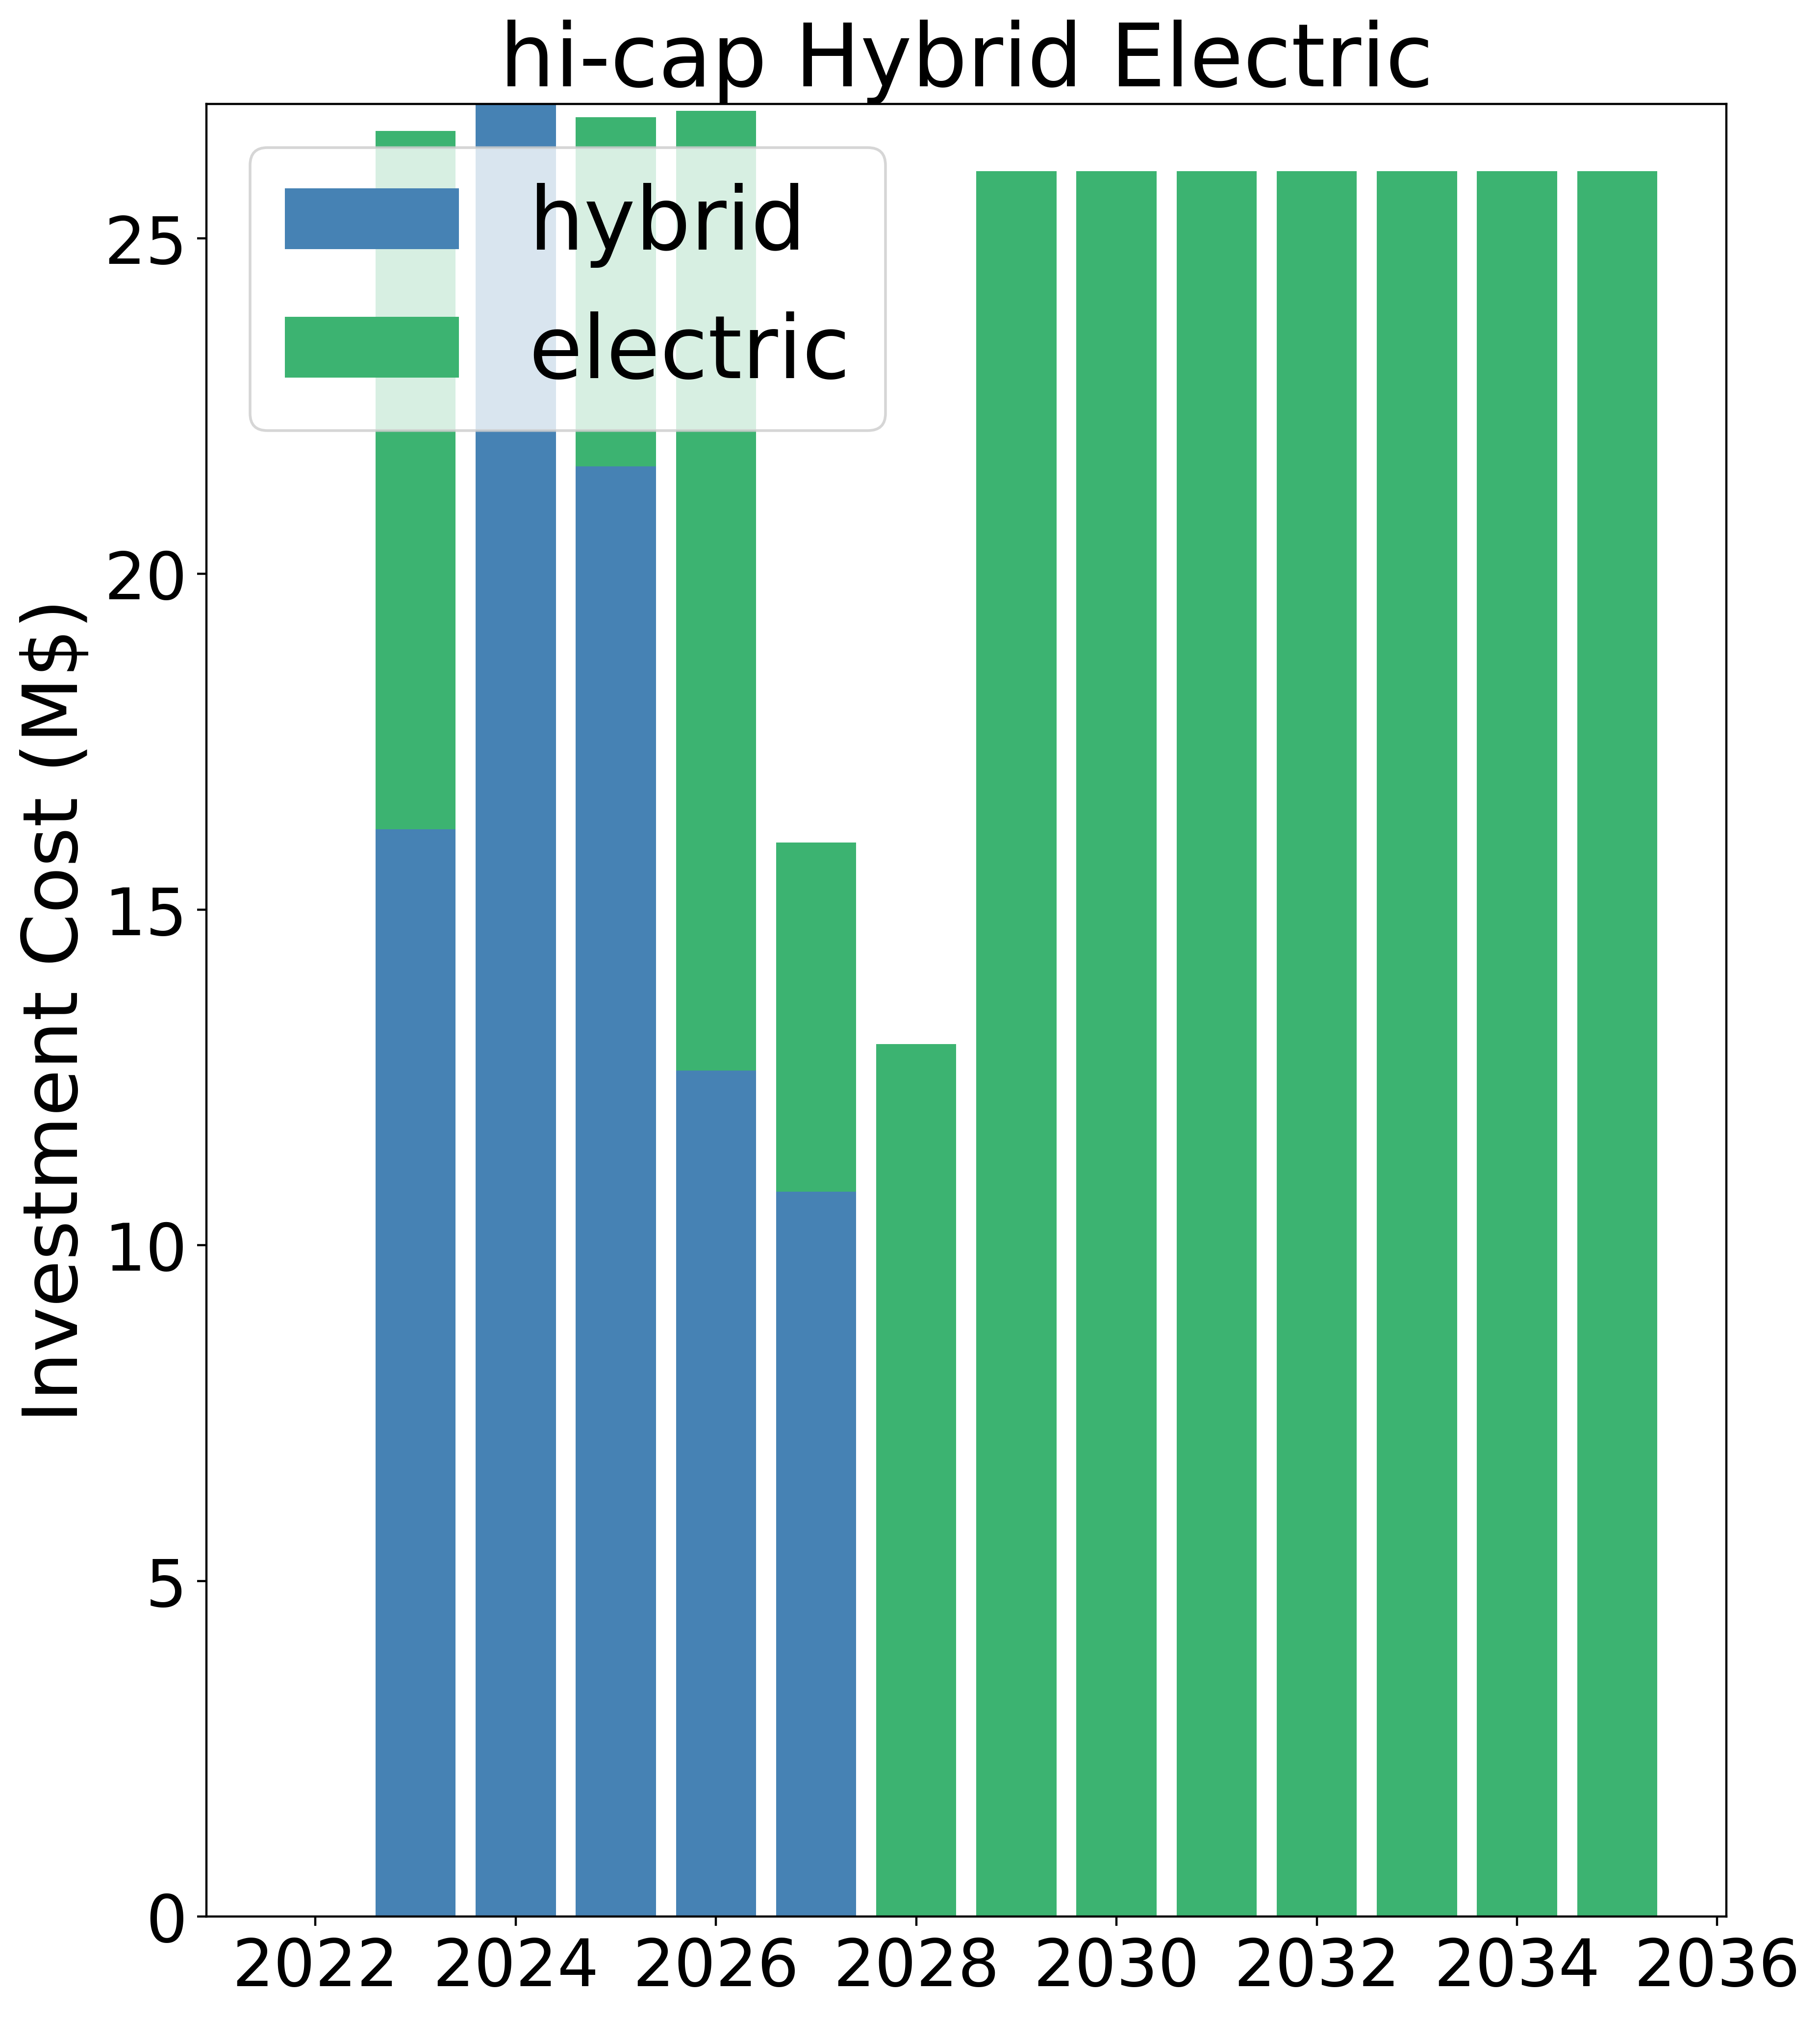

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the color palette
palette = {
    'HEB': 'steelblue',
    'BEB': 'mediumseagreen'
}

# Filter the dataframe for 'hi-cap Hybrid Electric' future
hi_cap_hybrid_electric = merged_df.loc[merged_df['future'] == 'hi-cap Hybrid Electric']

# Create a stacked bar plot with the desired figure size and DPI
plt.figure(figsize=(10, 12), dpi=400)
plt.bar(hi_cap_hybrid_electric['Year'], hi_cap_hybrid_electric['HEB - Investment Cost (M$)'],
        color=palette['HEB'], label='hybrid')
plt.bar(hi_cap_hybrid_electric['Year'], hi_cap_hybrid_electric['BEB - Investment Cost (M$)'],
        bottom=hi_cap_hybrid_electric['HEB - Investment Cost (M$)'],
        color=palette['BEB'], label='electric')

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Adding labels and title
#plt.xlabel('Year', fontsize=28)
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('hi-cap Hybrid Electric', fontsize=32)
plt.legend(fontsize=32)

# Show the plot
plt.show()


In [28]:
hi_cap_hybrid_electric['total_cost']=hi_cap_hybrid_electric['BEB - Investment Cost (M$)']+hi_cap_hybrid_electric['HEB - Investment Cost (M$)']
print('hi_cap_hybrid_electric_total_cost:',hi_cap_hybrid_electric['total_cost'].sum())

hi_cap_hybrid_electric_total_cost: 318.3


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_136680\2726631405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hi_cap_hybrid_electric['total_cost']=hi_cap_hybrid_electric['BEB - Investment Cost (M$)']+hi_cap_hybrid_electric['HEB - Investment Cost (M$)']


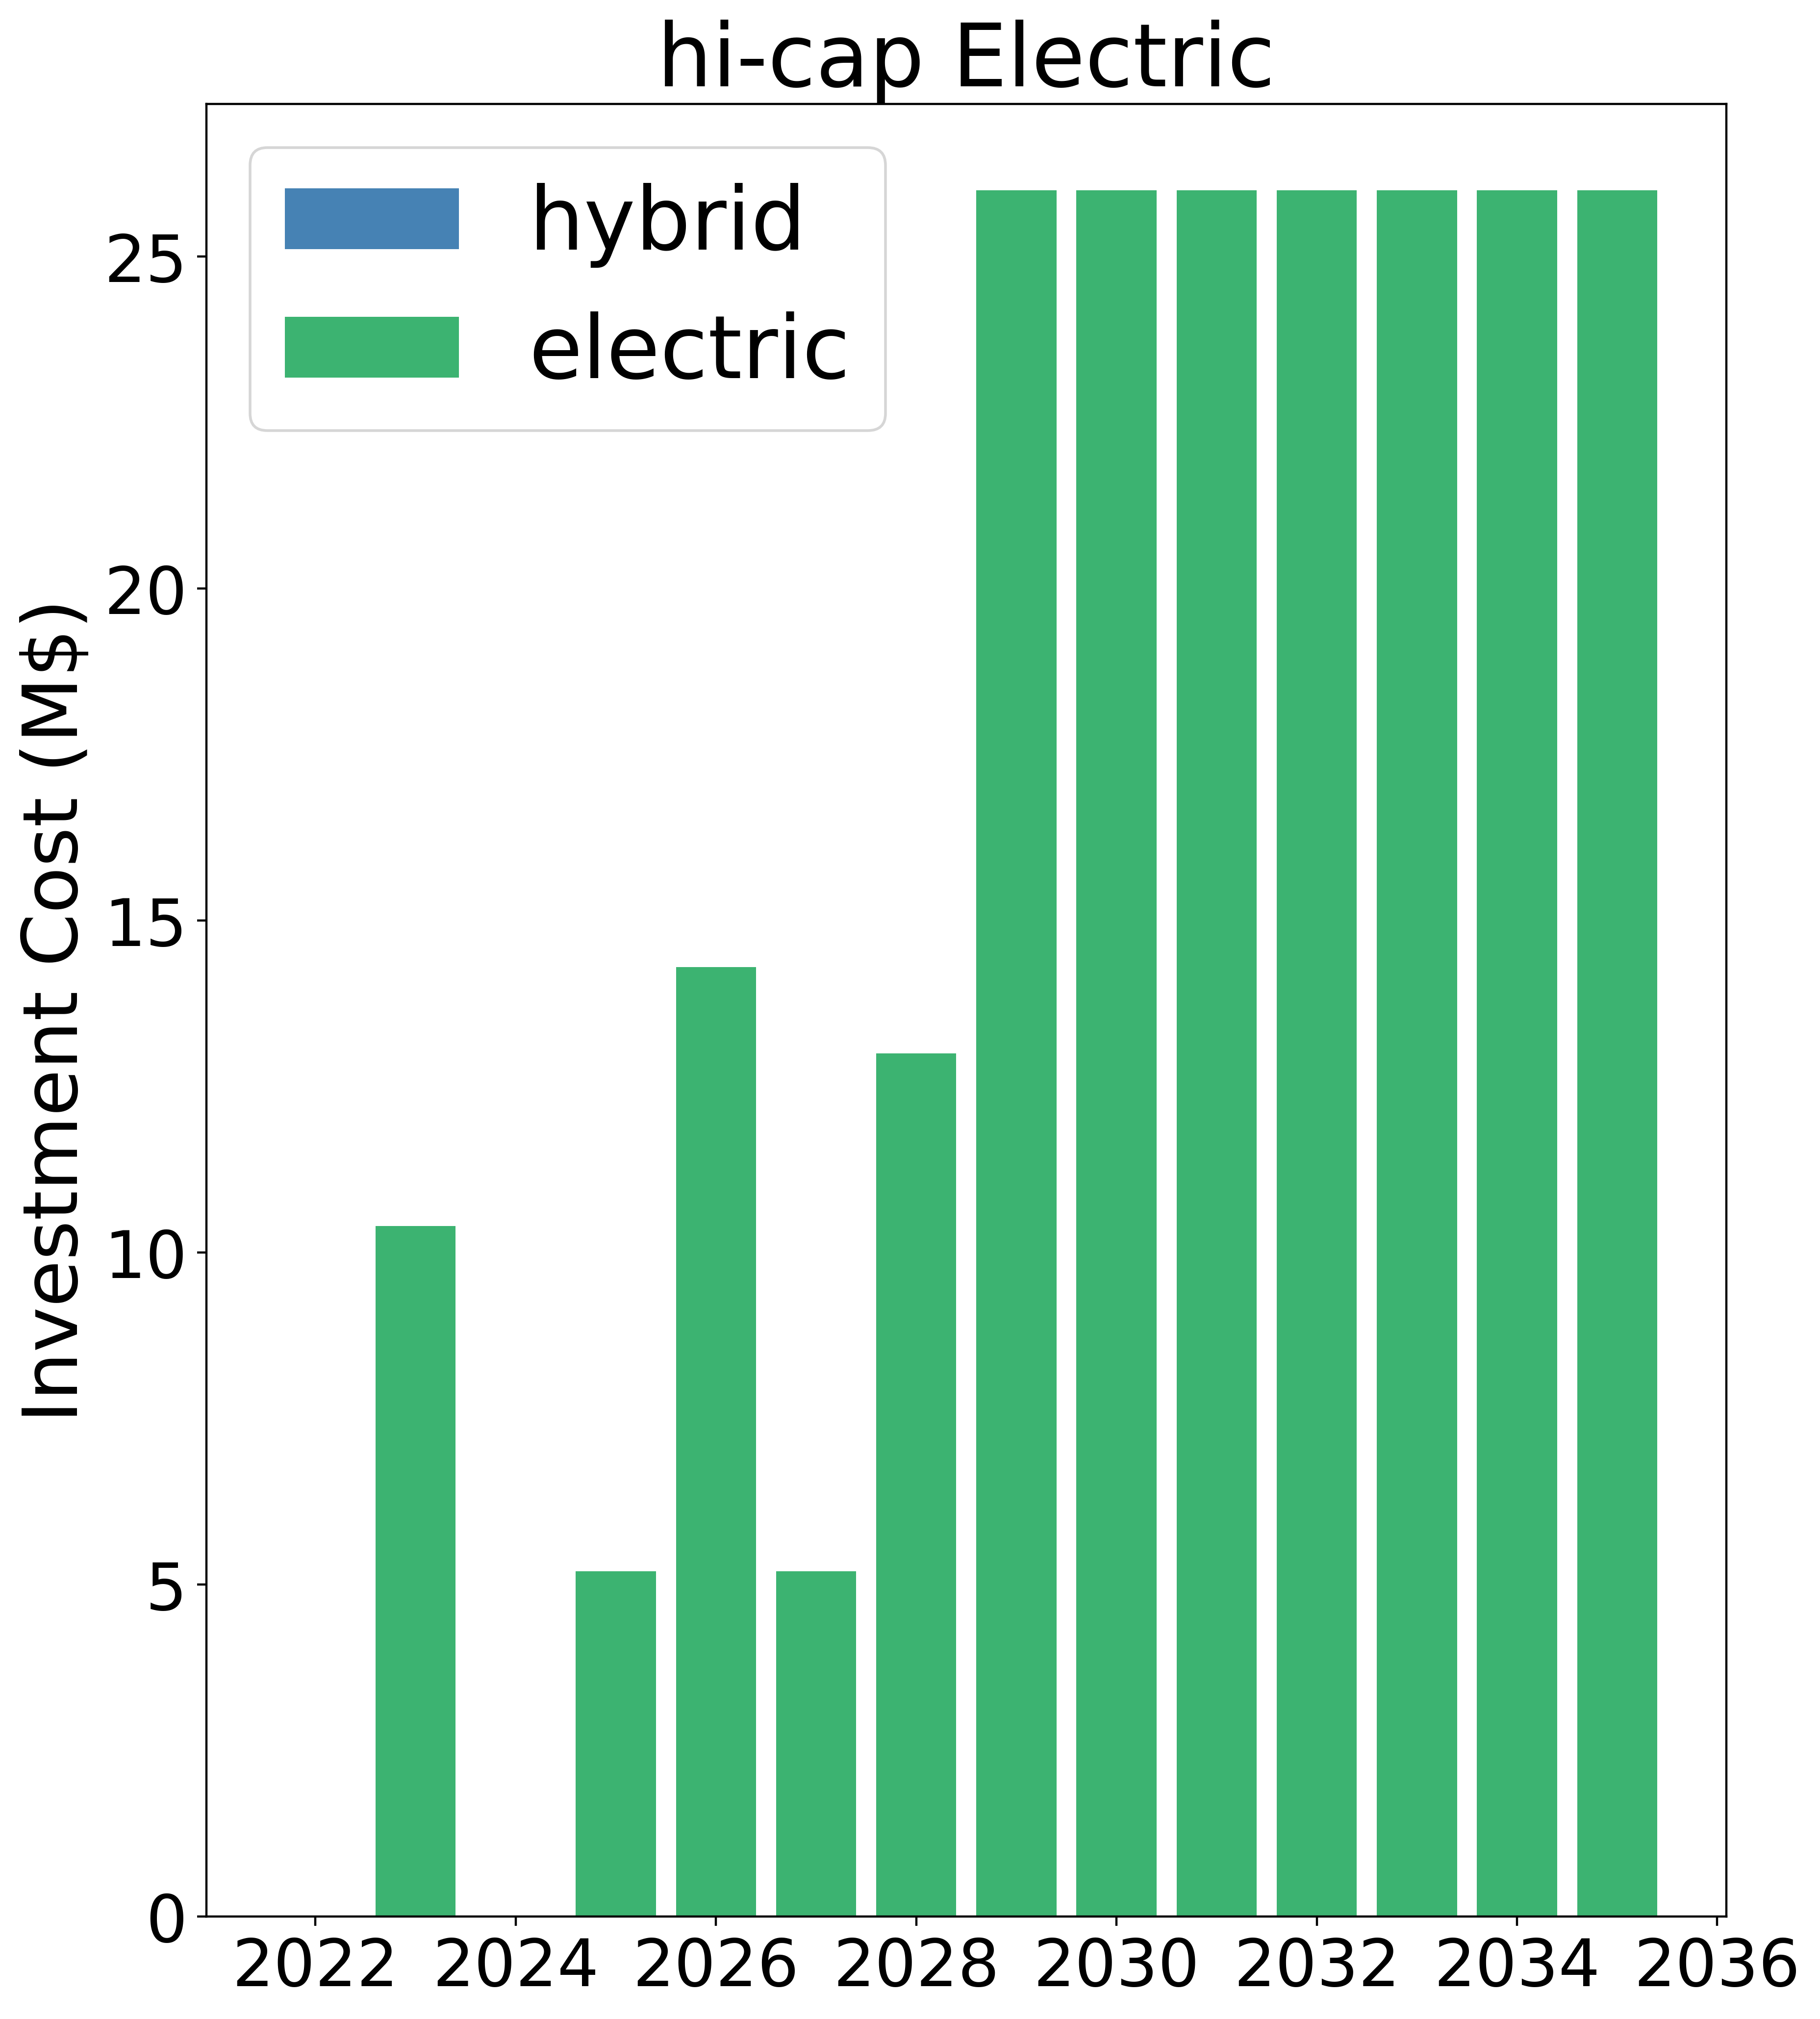

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the color palette
palette = {
    'HEB': 'steelblue',
    'BEB': 'mediumseagreen'
}

# Filter the dataframe for 'hi-cap Hybrid Electric' future
hi_cap_electric = merged_df.loc[merged_df['future'] == 'hi-cap Electric']

# Create a stacked bar plot with the desired figure size and DPI
plt.figure(figsize=(10, 12), dpi=400)
plt.bar(hi_cap_electric['Year'], hi_cap_electric['HEB - Investment Cost (M$)'],
        color=palette['HEB'], label='hybrid')
plt.bar(hi_cap_electric['Year'], hi_cap_electric['BEB - Investment Cost (M$)'],
        bottom=hi_cap_electric['HEB - Investment Cost (M$)'],
        color=palette['BEB'], label='electric')

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Adding labels and title
#plt.xlabel('Year', fontsize=28)
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('hi-cap Electric', fontsize=32)
plt.legend(fontsize=32)

# Show the plot
plt.show()


In [30]:
hi_cap_electric['total_cost']=hi_cap_electric['BEB - Investment Cost (M$)']+hi_cap_electric['HEB - Investment Cost (M$)']
print('hi_cap_electric_total_cost:',hi_cap_electric['total_cost'].sum())

hi_cap_electric_total_cost: 230.1


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_136680\612983904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hi_cap_electric['total_cost']=hi_cap_electric['BEB - Investment Cost (M$)']+hi_cap_electric['HEB - Investment Cost (M$)']


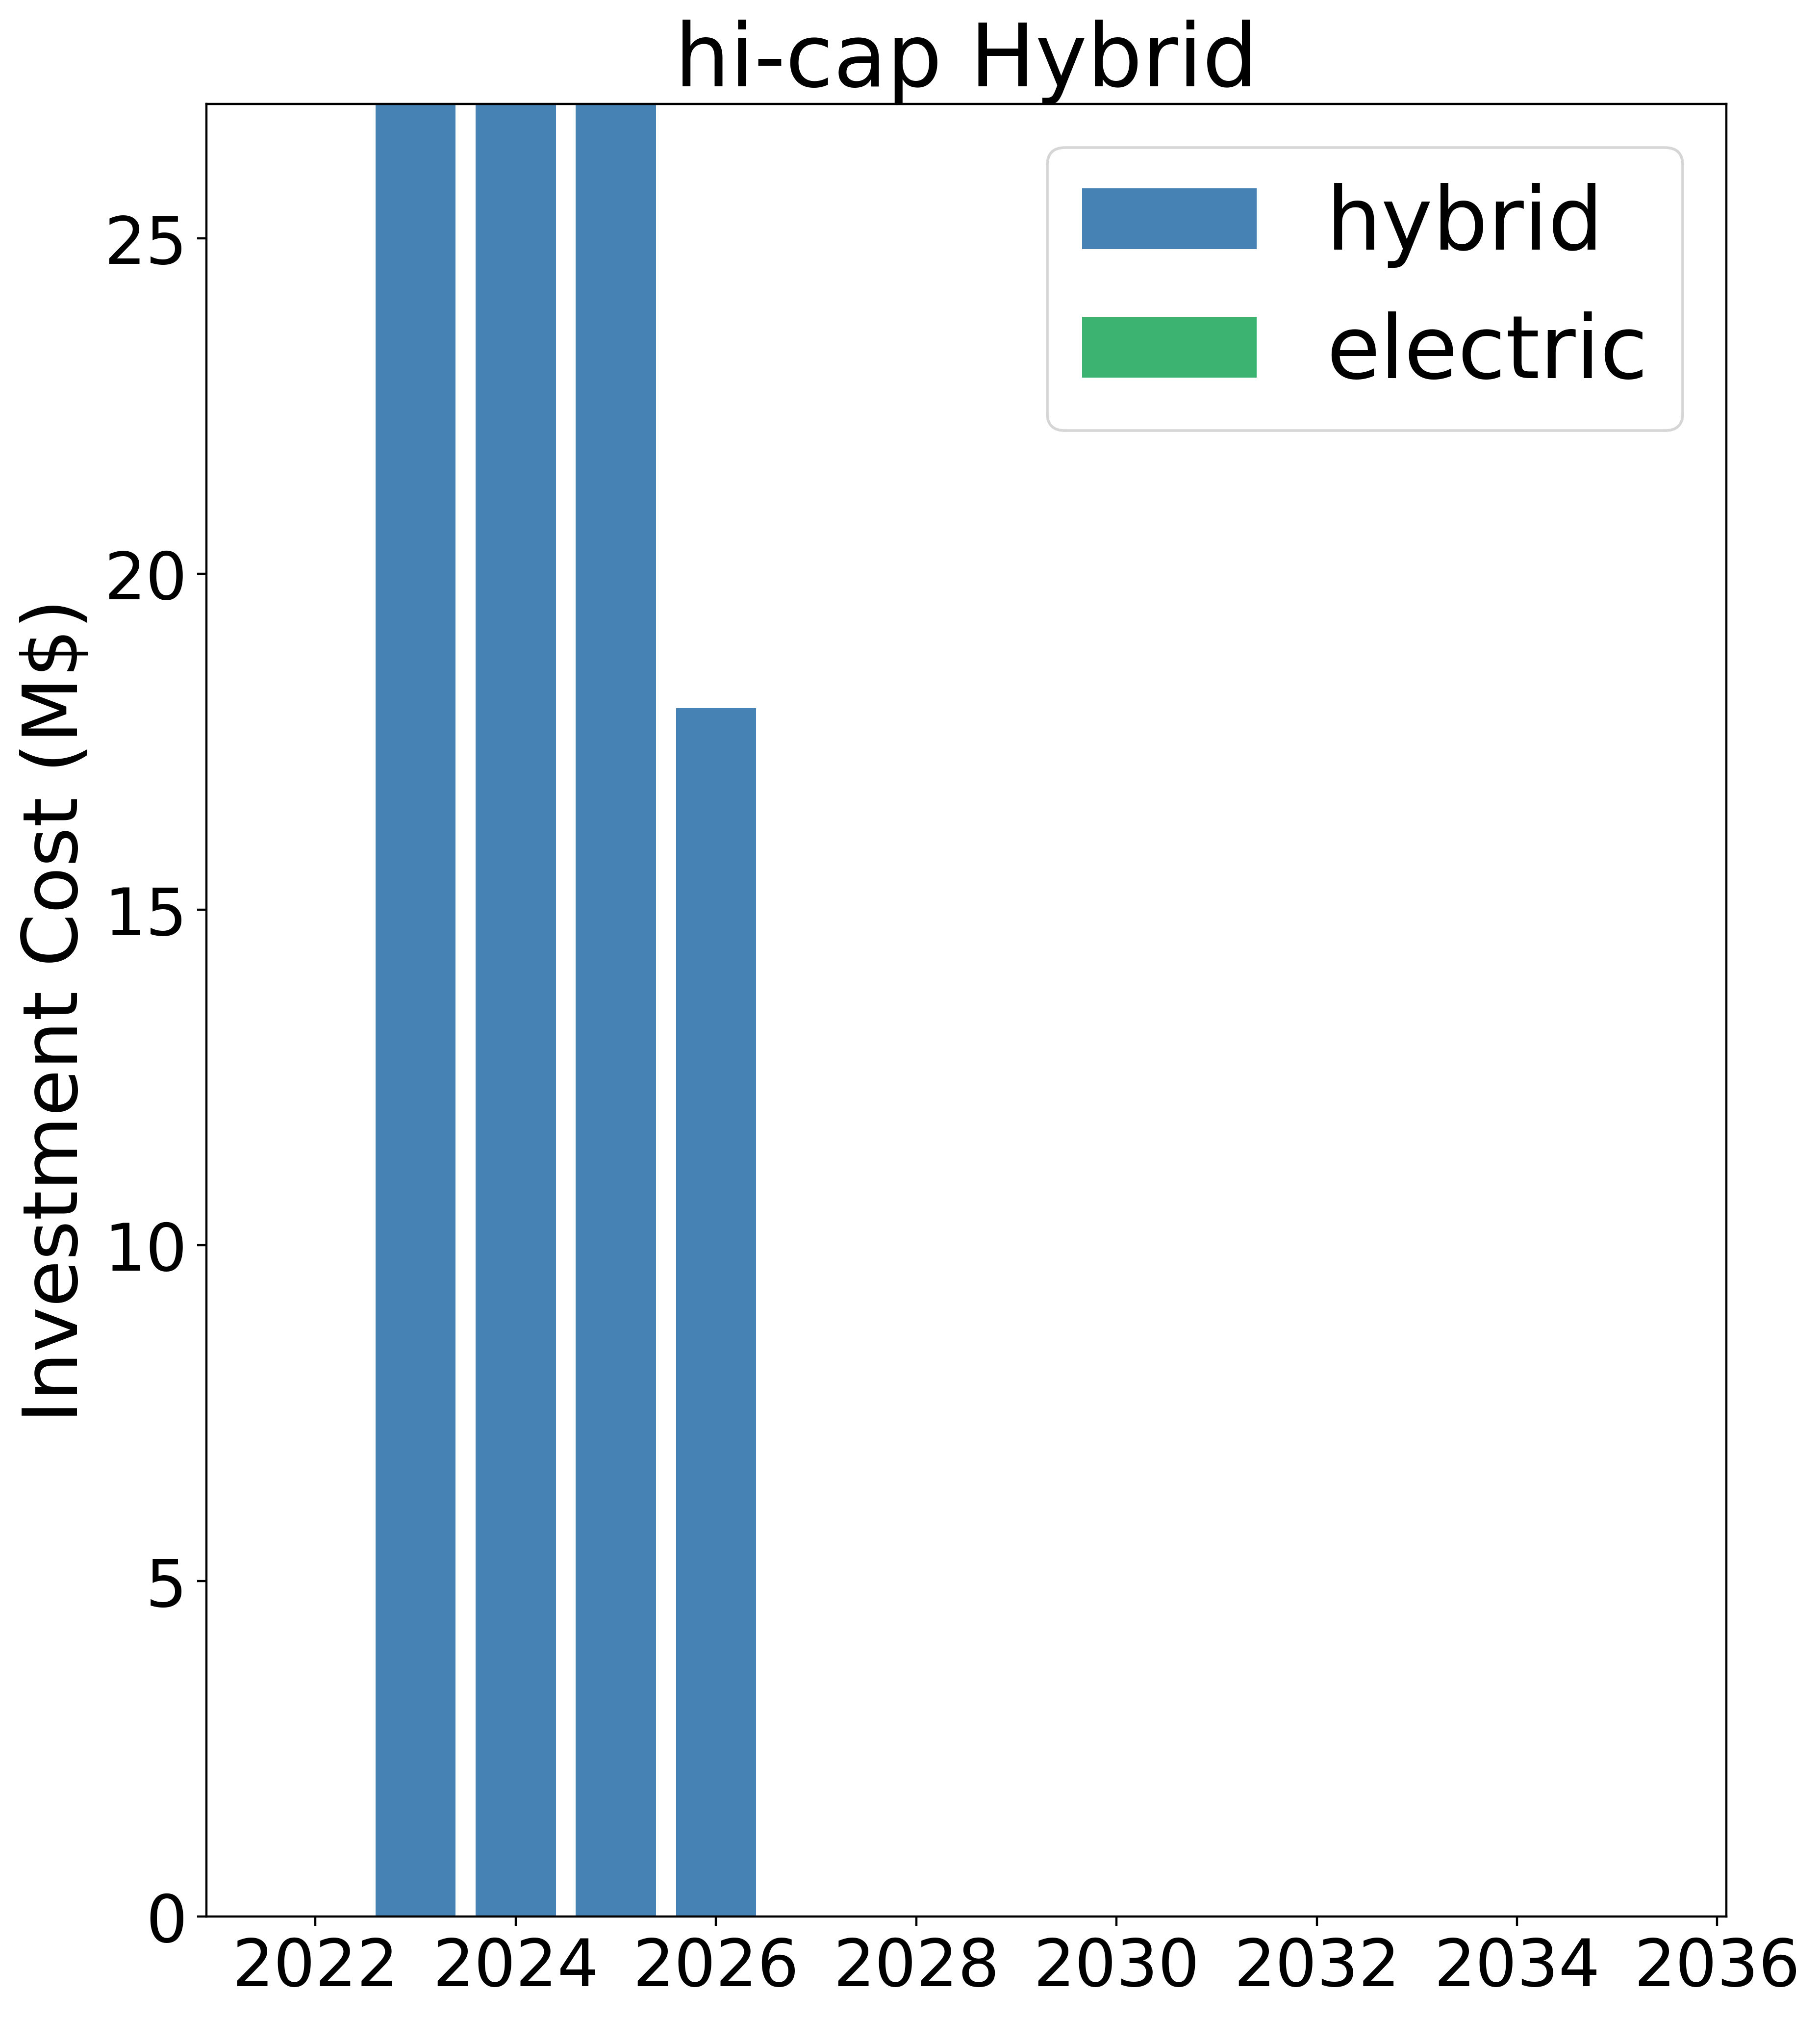

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the color palette
palette = {
    'HEB': 'steelblue',
    'BEB': 'mediumseagreen'
}

# Filter the dataframe for 'hi-cap Hybrid Electric' future
hi_cap_hybrid = merged_df.loc[merged_df['future'] == 'hi-cap Hybrid']

# Create a stacked bar plot with the desired figure size and DPI
plt.figure(figsize=(10, 12), dpi=400)
plt.bar(hi_cap_hybrid['Year'], hi_cap_hybrid['HEB - Investment Cost (M$)'],
        color=palette['HEB'], label='hybrid')
plt.bar(hi_cap_hybrid['Year'], hi_cap_hybrid['BEB - Investment Cost (M$)'],
        bottom=hi_cap_hybrid['HEB - Investment Cost (M$)'],
        color=palette['BEB'], label='electric')

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Adding labels and title
#plt.xlabel('Year', fontsize=28)
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('hi-cap Hybrid', fontsize=32)
plt.legend(fontsize=32)

# Show the plot
plt.show()


In [32]:
hi_cap_hybrid['total_cost']=hi_cap_hybrid['BEB - Investment Cost (M$)']+hi_cap_hybrid['HEB - Investment Cost (M$)']
print('hi_cap_hybrid_total_cost:',hi_cap_hybrid['total_cost'].sum())

hi_cap_hybrid_total_cost: 99.0


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_136680\2295971197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hi_cap_hybrid['total_cost']=hi_cap_hybrid['BEB - Investment Cost (M$)']+hi_cap_hybrid['HEB - Investment Cost (M$)']


In [33]:
replacement_plan = pd.read_csv(r'../../data/tidy/replacement_plan.csv', low_memory=False)

In [34]:
replacement_plan

,Year,conventional,electric,hybrid
0,2022,0,0,0
1,2023,9,0,0
2,2024,5,0,0
3,2025,21,0,0
4,2026,13,0,4
5,2027,8,0,0
6,2028,8,2,3
7,2029,9,0,0
8,2030,9,0,0
9,2031,0,2,0


In [52]:
do_nothing = replacement_plan.copy()

# Calculate the new columns
do_nothing['CDB- Investment Cost (M$)'] = do_nothing['conventional'] * 0.4
do_nothing['HEB - Investment Cost (M$)'] = do_nothing['hybrid'] * 0.9
do_nothing['BEB- Investment Cost (M$)'] = do_nothing['electric'] * 1.3

do_nothing

,Year,conventional,electric,hybrid,CDB- Investment Cost (M$),HEB - Investment Cost (M$),BEB- Investment Cost (M$)
0,2022,0,0,0,0.0,0.0,0.0
1,2023,9,0,0,3.6,0.0,0.0
2,2024,5,0,0,2.0,0.0,0.0
3,2025,21,0,0,8.4,0.0,0.0
4,2026,13,0,4,5.2,3.6,0.0
5,2027,8,0,0,3.2,0.0,0.0
6,2028,8,2,3,3.2,2.7,2.6
7,2029,9,0,0,3.6,0.0,0.0
8,2030,9,0,0,3.6,0.0,0.0
9,2031,0,2,0,0.0,0.0,2.6


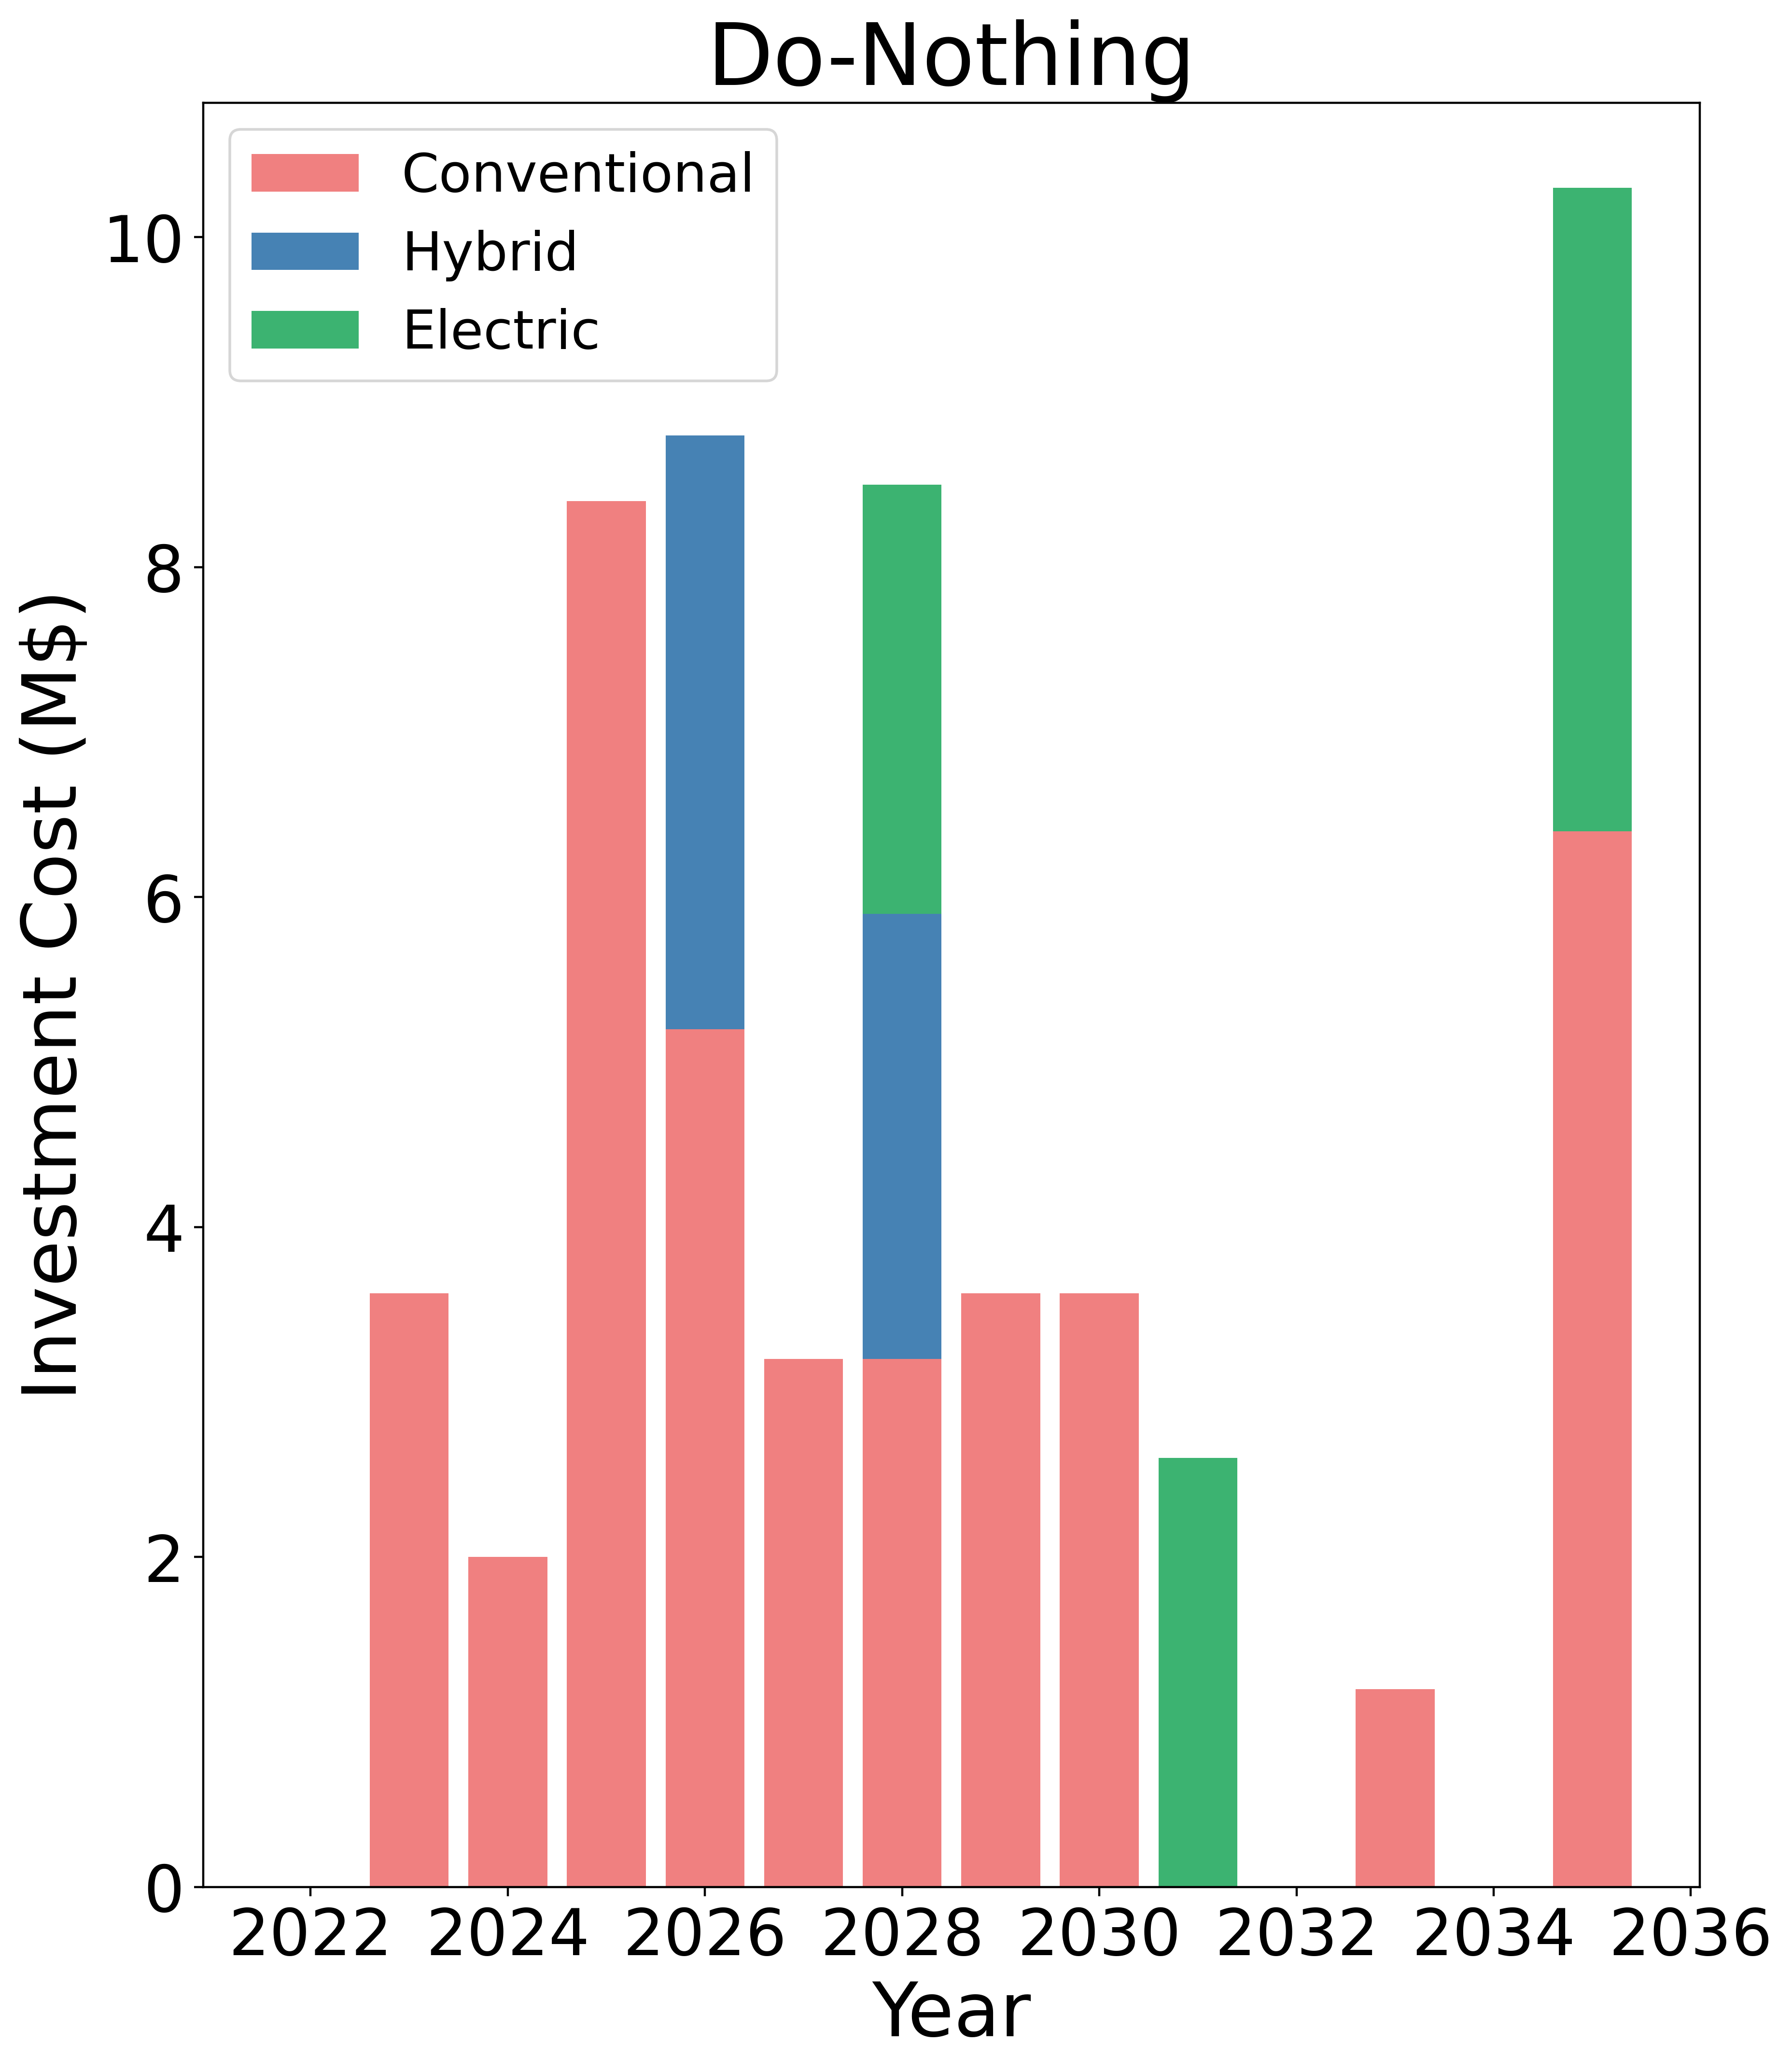

In [53]:
# Define the color palette
palette = {
    'CDB': 'lightcoral',
    'HEB': 'steelblue',
    'BEB': 'mediumseagreen'
}

# Create a stacked bar plot with the desired figure size and DPI
plt.figure(figsize=(10, 12), dpi=400)

# Stacking the bars for each category
plt.bar(do_nothing['Year'], do_nothing['CDB- Investment Cost (M$)'],
        color=palette['CDB'], label='Conventional')
plt.bar(do_nothing['Year'], do_nothing['HEB - Investment Cost (M$)'],
        bottom=do_nothing['CDB- Investment Cost (M$)'],
        color=palette['HEB'], label='Hybrid')
plt.bar(do_nothing['Year'], do_nothing['BEB- Investment Cost (M$)'],
        bottom=do_nothing['CDB- Investment Cost (M$)'] + do_nothing['HEB - Investment Cost (M$)'],
        color=palette['BEB'], label='Electric')

# Setting the font size for x and y ticks
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Adding labels and title
plt.xlabel('Year', fontsize=28)
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('Do-Nothing', fontsize=32)
plt.legend(fontsize=20, loc='upper left')

# Show the plot
plt.show()

In [54]:
do_nothing['total_cost']=do_nothing['CDB- Investment Cost (M$)']+do_nothing['HEB - Investment Cost (M$)']+do_nothing['BEB- Investment Cost (M$)']
print('do_nothing_total_cost:',do_nothing['total_cost'].sum())

do_nothing_total_cost: 55.80000000000001


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_136680\3959811573.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp['CDB - Investment Cost (M$)'] = 0


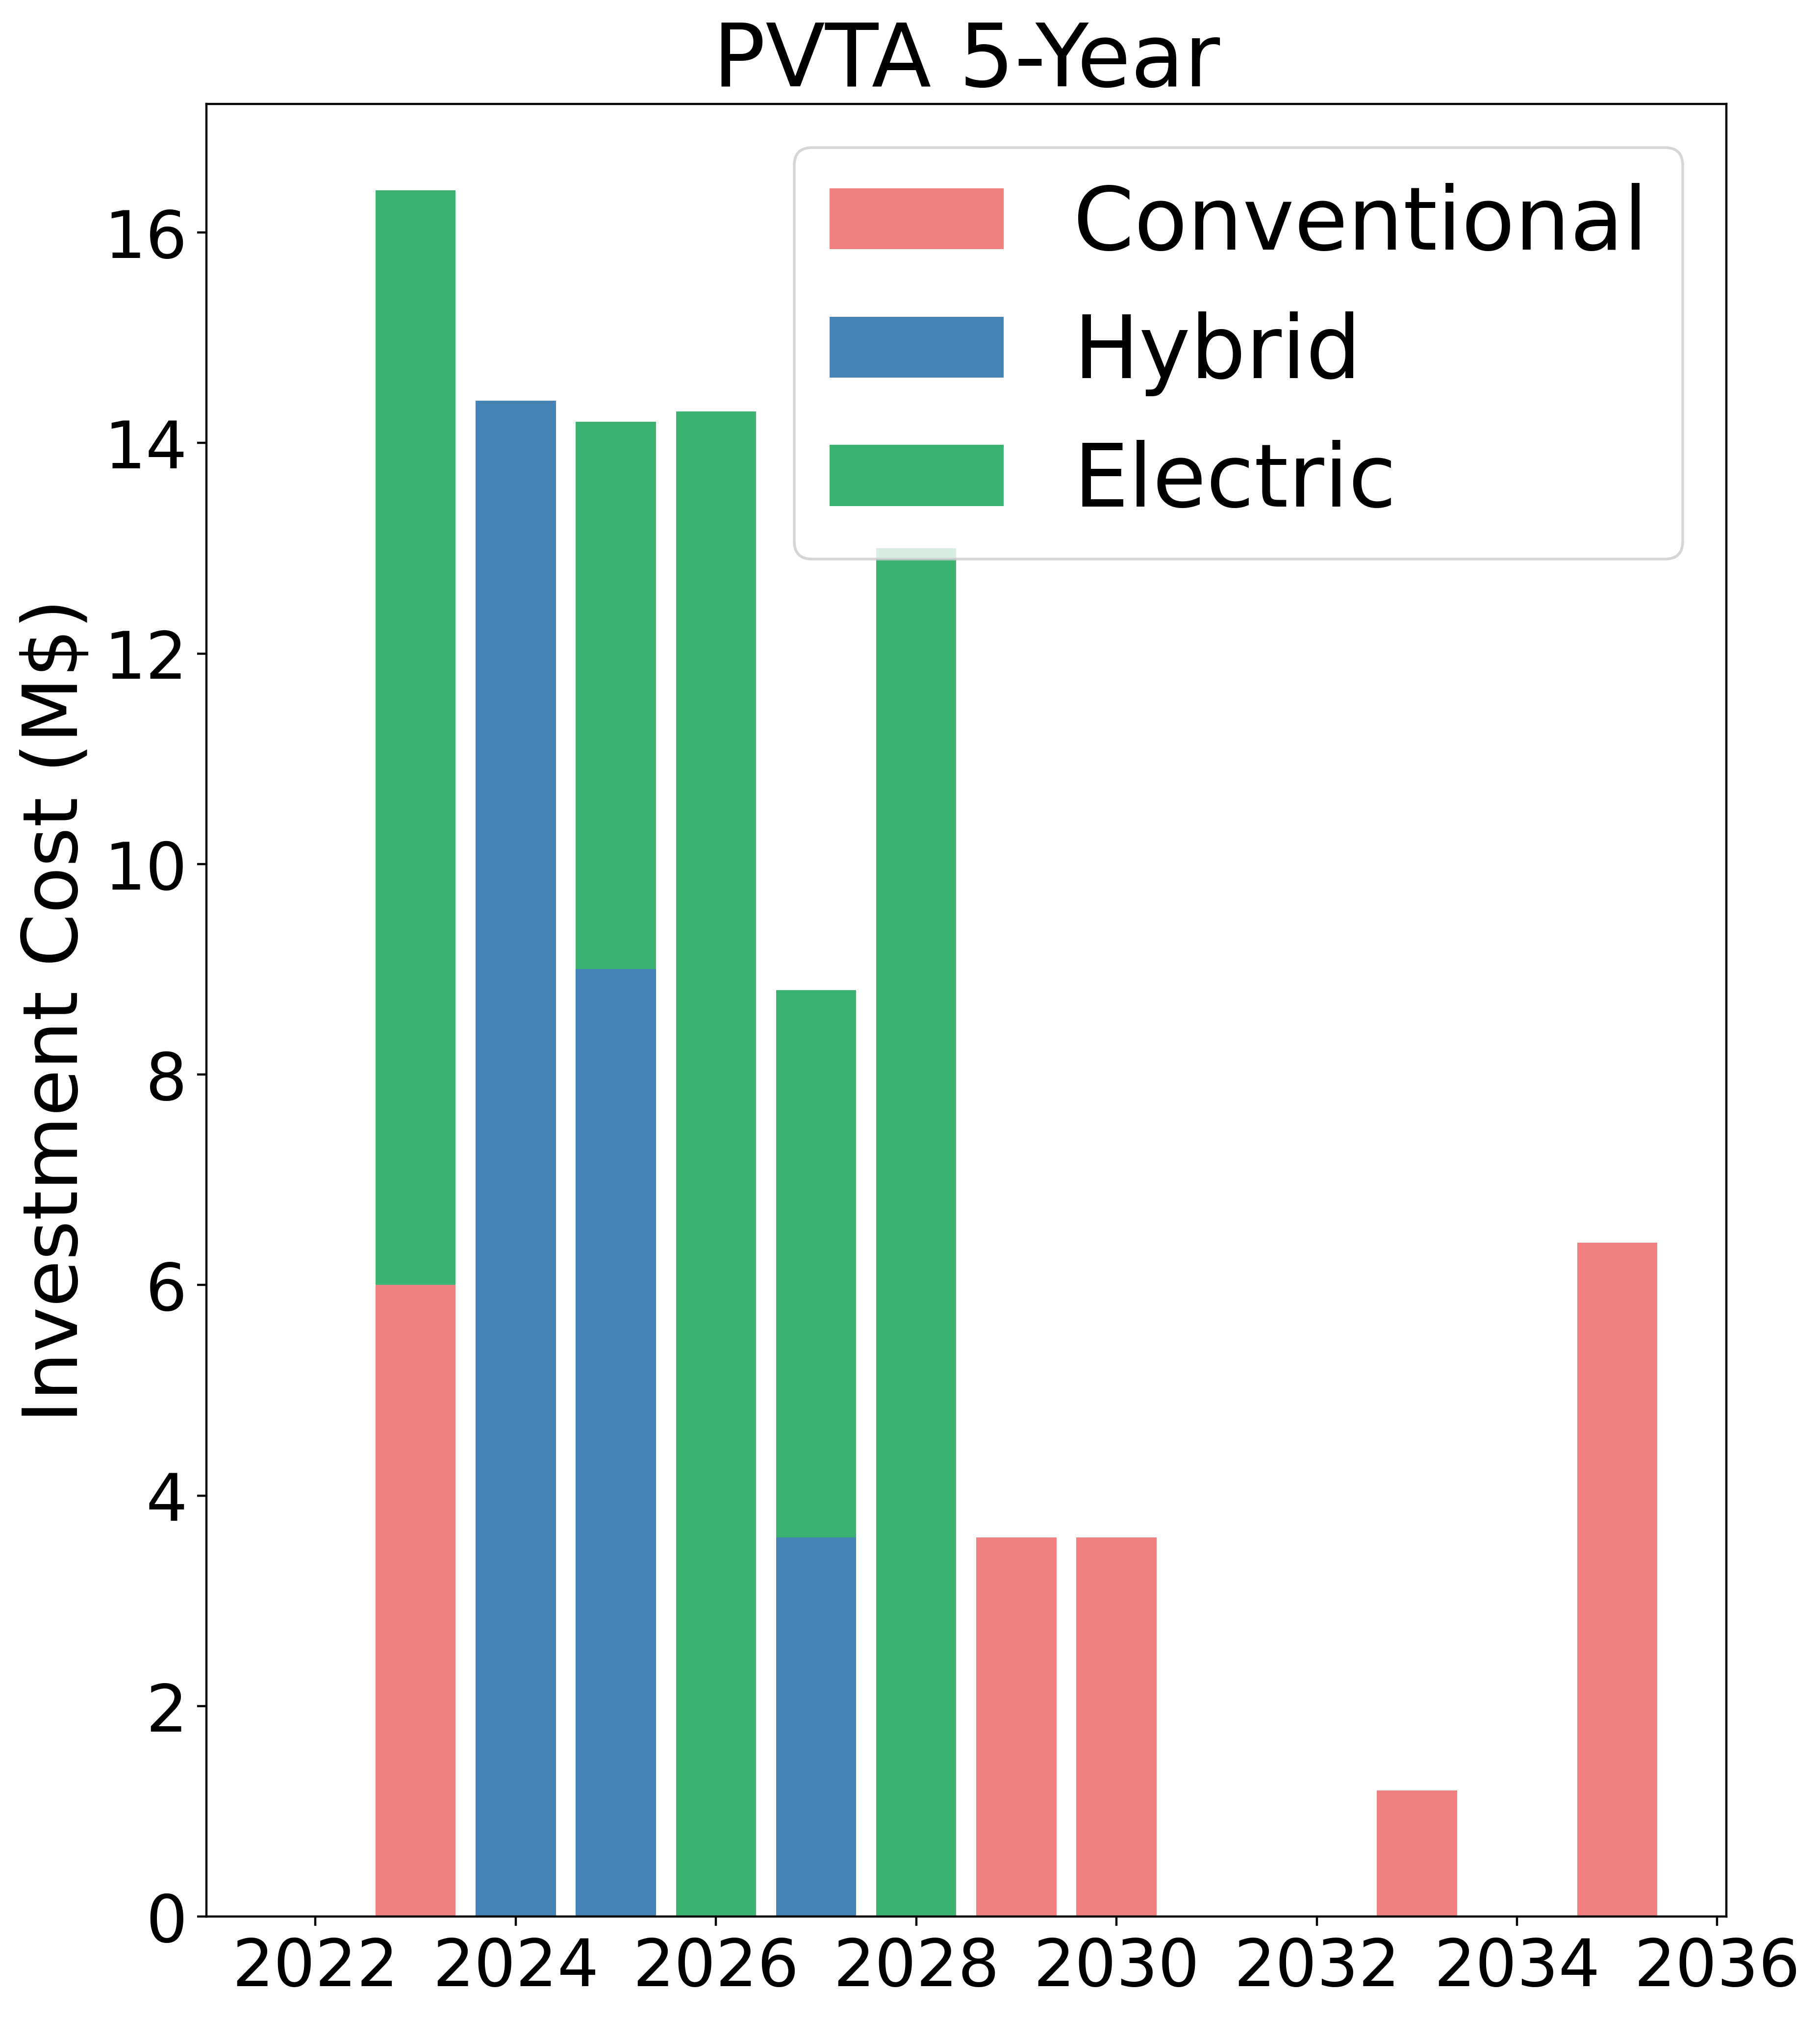

In [67]:
# Define the color palette
palette = {
    'CDB': 'lightcoral',
    'HEB': 'steelblue',
    'BEB': 'mediumseagreen'
}


# Filter the dataframe for 'hi-cap Hybrid Electric' future
pp = merged_df.loc[merged_df['future'] == 'PVTA 5-Year']

# Set the whole column to 0
pp['CDB - Investment Cost (M$)'] = 0

# Set the value for the year 2023 to 20*0.5
pp.loc[pp['Year'] == 2023, 'CDB - Investment Cost (M$)'] = 15 * 0.4


# Create a stacked bar plot with the desired figure size and DPI
plt.figure(figsize=(10, 12), dpi=400)

# for the years 2029 to 2035
for year in range(2029, 2036):  # This will loop from 2029 to 2035 inclusive
    pp.loc[pp['Year'] == year, 'CDB - Investment Cost (M$)'] = do_nothing.loc[do_nothing['Year'] == year, 'CDB- Investment Cost (M$)']


# Stacking the bars for each category
plt.bar(pp['Year'], pp['CDB - Investment Cost (M$)'],
        color=palette['CDB'], label='Conventional')
plt.bar(pp['Year'], pp['HEB - Investment Cost (M$)'],
        bottom=pp['CDB - Investment Cost (M$)'],
        color=palette['HEB'], label='Hybrid')
plt.bar(pp['Year'], pp['BEB - Investment Cost (M$)'],
        bottom=pp['CDB - Investment Cost (M$)'] + pp['HEB - Investment Cost (M$)'],
        color=palette['BEB'], label='Electric')

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Adding labels and title
#plt.xlabel('Year', fontsize=28)
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('PVTA 5-Year', fontsize=32)
plt.legend(fontsize=32)

# Show the plot
plt.show()


In [63]:
pp['total_cost']=pp['CDB - Investment Cost (M$)']+pp['HEB - Investment Cost (M$)']+pp['BEB - Investment Cost (M$)']
print('pp_total_cost:',pp['total_cost'].sum())

pp_total_cost: 97.9


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_136680\4061961009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp['total_cost']=pp['CDB - Investment Cost (M$)']+pp['HEB - Investment Cost (M$)']+pp['BEB - Investment Cost (M$)']


In [66]:
pp

,Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$),future,yearly_purchased_buses,CDB - Investment Cost (M$)
0,2022,15,9,0.0,0.0,0.0,0.0,PVTA 5-Year,0.0,0.0
1,2023,23,9,8.0,0.0,10.4,0.0,PVTA 5-Year,8.0,7.2
2,2024,23,25,0.0,16.0,0.0,14.4,PVTA 5-Year,16.0,0.0
3,2025,27,35,4.0,10.0,5.2,9.0,PVTA 5-Year,14.0,0.0
4,2026,38,35,11.0,0.0,14.3,0.0,PVTA 5-Year,11.0,0.0
5,2027,42,39,4.0,4.0,5.2,3.6,PVTA 5-Year,8.0,0.0
6,2028,52,39,10.0,0.0,13.0,0.0,PVTA 5-Year,10.0,0.0
7,2029,52,39,0.0,0.0,0.0,0.0,PVTA 5-Year,0.0,3.6
8,2030,52,39,0.0,0.0,0.0,0.0,PVTA 5-Year,0.0,3.6
9,2031,52,39,0.0,0.0,0.0,0.0,PVTA 5-Year,0.0,0.0


In [134]:
replacement_plan = pd.read_csv(r'../../data/tidy/replacement_plan.csv', low_memory=False)

In [135]:
replacement_plan

,Year,conventional,electric,hybrid
0,2022,2,0,0
1,2023,21,0,0
2,2024,5,0,0
3,2025,21,0,0
4,2026,17,0,4
5,2027,8,0,0
6,2028,13,2,3
7,2029,9,0,0
8,2030,9,0,0
9,2031,2,2,0


In [90]:
replacement_plan['yearly_replacement_buses']=replacement_plan['conventional']+replacement_plan['hybrid']+replacement_plan['electric']

In [92]:
### Adjust replacement plan based on Sandras' email:
#FY22 we replaced 14 vehicles. FY23 we replaced 20.  We also apply for grants but again those grant funds need to be matched.  In FY23 we replaced 8 electric vehicles with Low/No grant funds.  For FY24, we just placed an order for 16 buses and expect to order 14 in FY25.
#sandra_2022_actual=14

In [93]:
#year_2022_conventional_replacement = replacement_plan.loc[replacement_plan['Year'] == 2022, 'conventional'].iloc[0]
#year_2023_conventional_replacement = replacement_plan.loc[replacement_plan['Year'] == 2023, 'conventional'].iloc[0]
#print('original replacement of year 2022',year_2022_conventional_replacement)
#print('original replacement of year 2023',year_2023_conventional_replacement)

In [95]:
#replacement_plan['yearly_replacement_buses'].loc[replacement_plan['Year'] == 2023]=year_2023_conventional_replacement-year_2022_conventional_replacement
replacement_plan['yearly_replacement_buses'].loc[replacement_plan['Year'] == 2022]=0
replacement_plan

,Year,conventional,electric,hybrid,yearly_replacement_buses
0,2022,2,0,0,0
1,2023,21,0,0,21
2,2024,5,0,0,5
3,2025,21,0,0,21
4,2026,17,0,4,21
5,2027,8,0,0,8
6,2028,13,2,3,18
7,2029,9,0,0,9
8,2030,9,0,0,9
9,2031,2,2,0,4


In [96]:
merged_df

,Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$),future,yearly_purchased_buses
0,2022,15,9,0.0,0.0,0.0,0.0,PVTA 5-Year,0.0
1,2023,23,9,8.0,0.0,10.4,0.0,PVTA 5-Year,8.0
2,2024,23,25,0.0,16.0,0.0,14.4,PVTA 5-Year,16.0
3,2025,27,35,4.0,10.0,5.2,9.0,PVTA 5-Year,14.0
4,2026,38,35,11.0,0.0,14.3,0.0,PVTA 5-Year,11.0
...,...,...,...,...,...,...,...,...,...
135,2031,51,27,4.0,2.0,5.2,1.8,lo-cap Hybrid Electric,6.0
136,2032,55,29,4.0,2.0,5.2,1.8,lo-cap Hybrid Electric,6.0
137,2033,59,31,4.0,2.0,5.2,1.8,lo-cap Hybrid Electric,6.0
138,2034,63,33,4.0,2.0,5.2,1.8,lo-cap Hybrid Electric,6.0


In [97]:
# Step 1: Calculate the cumulative 'yearly_purchased_buses' for each unique 'future'
merged_df['cumulative_purchased_buses'] = merged_df.groupby('future')['yearly_purchased_buses'].cumsum()

# Step 2: Calculate the cumulative 'yearly_replacement_buses' in replacement_plan
replacement_plan['cumulative_replacement_buses'] = replacement_plan['yearly_replacement_buses'].cumsum()

# Step 3: Merge the dataframes on 'Year'
merged_data = pd.merge(merged_df, replacement_plan[['Year', 'cumulative_replacement_buses']], on='Year', how='left')

# Step 4: Calculate 'replacement_not_satisfied'
merged_data['replacement_not_satisfied'] = merged_data['cumulative_replacement_buses'] - merged_data['cumulative_purchased_buses']

merged_data[['Year','future','cumulative_purchased_buses','cumulative_replacement_buses','replacement_not_satisfied']]

,Year,future,cumulative_purchased_buses,cumulative_replacement_buses,replacement_not_satisfied
0,2022,PVTA 5-Year,0.0,0,0.0
1,2023,PVTA 5-Year,8.0,21,13.0
2,2024,PVTA 5-Year,24.0,26,2.0
3,2025,PVTA 5-Year,38.0,47,9.0
4,2026,PVTA 5-Year,49.0,68,19.0
...,...,...,...,...,...
135,2031,lo-cap Hybrid Electric,54.0,116,62.0
136,2032,lo-cap Hybrid Electric,60.0,116,56.0
137,2033,lo-cap Hybrid Electric,66.0,119,53.0
138,2034,lo-cap Hybrid Electric,72.0,119,47.0


In [117]:
merged_data.loc[merged_data['future']=='PVTA 5-Year']

,Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$),future,yearly_purchased_buses,cumulative_purchased_buses,cumulative_replacement_buses,replacement_not_satisfied
0,2022,15,9,0.0,0.0,0.0,0.0,PVTA 5-Year,0.0,0.0,0,0.0
1,2023,23,9,8.0,0.0,10.4,0.0,PVTA 5-Year,8.0,8.0,21,13.0
2,2024,23,25,0.0,16.0,0.0,14.4,PVTA 5-Year,16.0,24.0,26,2.0
3,2025,27,35,4.0,10.0,5.2,9.0,PVTA 5-Year,14.0,38.0,47,9.0
4,2026,38,35,11.0,0.0,14.3,0.0,PVTA 5-Year,11.0,49.0,68,19.0
5,2027,42,39,4.0,4.0,5.2,3.6,PVTA 5-Year,8.0,57.0,76,19.0
6,2028,52,39,10.0,0.0,13.0,0.0,PVTA 5-Year,10.0,67.0,94,27.0
7,2029,52,39,0.0,0.0,0.0,0.0,PVTA 5-Year,0.0,67.0,103,36.0
8,2030,52,39,0.0,0.0,0.0,0.0,PVTA 5-Year,0.0,67.0,112,45.0
9,2031,52,39,0.0,0.0,0.0,0.0,PVTA 5-Year,0.0,67.0,116,49.0


In [ ]:
merged_data.loc[merged_data['future']=='hi-cap Hybrid']

In [99]:
# Filter the dataframe to get rows where 'replacement_not_satisfied' is positive
positive_replacement_not_satisfied = merged_data[merged_data['replacement_not_satisfied'] > 0]

# Select only the required columns
subset_df = positive_replacement_not_satisfied[['Year', 'future', 'replacement_not_satisfied']]
subset_df['future'].unique()

array(['PVTA 5-Year', 'hi-cap Electric', 'mid-cap Electric',
       'lo-cap Electric', 'hi-cap Hybrid', 'mid-cap Hybrid',
       'lo-cap Hybrid', 'mid-cap Hybrid Electric',
       'lo-cap Hybrid Electric'], dtype=object)

In [ ]:
# The only future that was feasibile considering the replacement plan is hi-cap Hybrid Electric and hi-cap Hybrid

In [100]:
merged_df

,Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$),future,yearly_purchased_buses,cumulative_purchased_buses
0,2022,15,9,0.0,0.0,0.0,0.0,PVTA 5-Year,0.0,0.0
1,2023,23,9,8.0,0.0,10.4,0.0,PVTA 5-Year,8.0,8.0
2,2024,23,25,0.0,16.0,0.0,14.4,PVTA 5-Year,16.0,24.0
3,2025,27,35,4.0,10.0,5.2,9.0,PVTA 5-Year,14.0,38.0
4,2026,38,35,11.0,0.0,14.3,0.0,PVTA 5-Year,11.0,49.0
...,...,...,...,...,...,...,...,...,...,...
135,2031,51,27,4.0,2.0,5.2,1.8,lo-cap Hybrid Electric,6.0,54.0
136,2032,55,29,4.0,2.0,5.2,1.8,lo-cap Hybrid Electric,6.0,60.0
137,2033,59,31,4.0,2.0,5.2,1.8,lo-cap Hybrid Electric,6.0,66.0
138,2034,63,33,4.0,2.0,5.2,1.8,lo-cap Hybrid Electric,6.0,72.0


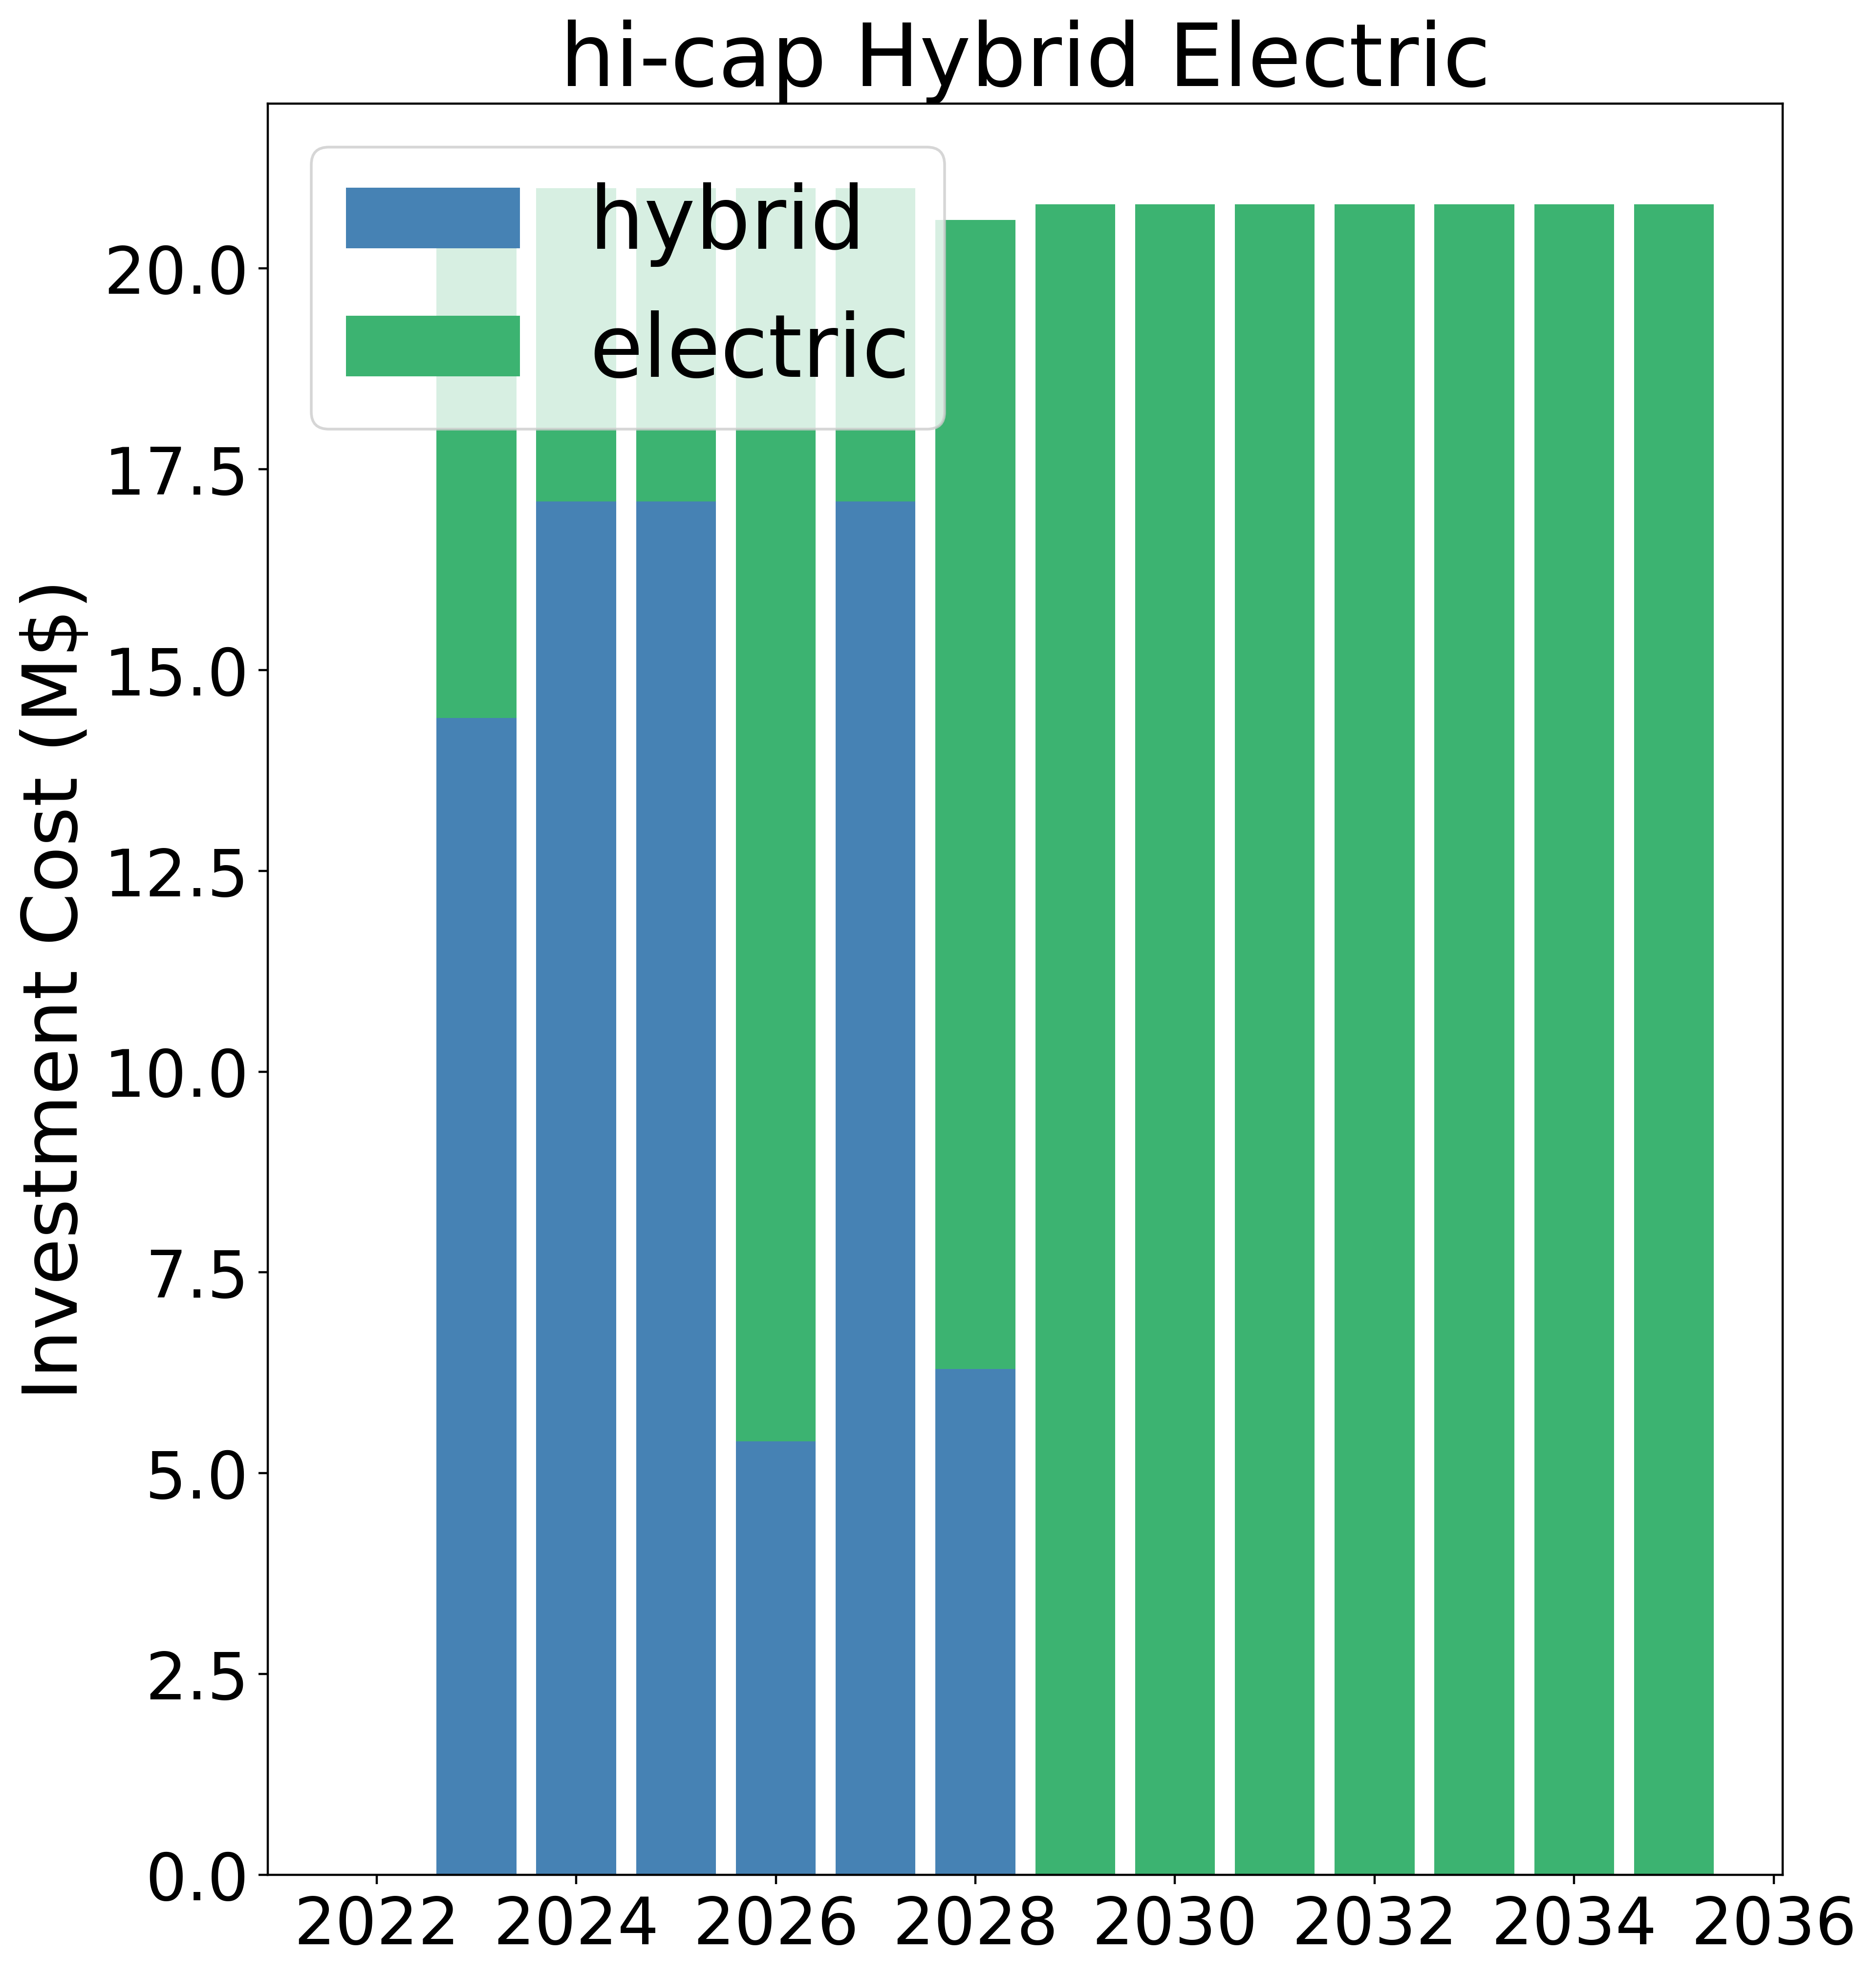

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the color palette
palette = {
    'HEB': 'steelblue',
    'BEB': 'mediumseagreen'
}

# Filter the dataframe for 'hi-cap Hybrid Electric' future
hi_cap_hybrid_electric = merged_df.loc[merged_df['future'] == 'hi-cap Hybrid Electric']

# Create a stacked bar plot with the desired figure size and DPI
plt.figure(figsize=(10, 12), dpi=400)
plt.bar(hi_cap_hybrid_electric['Year'], hi_cap_hybrid_electric['HEB - Investment Cost (M$)'],
        color=palette['HEB'], label='hybrid')
plt.bar(hi_cap_hybrid_electric['Year'], hi_cap_hybrid_electric['BEB - Investment Cost (M$)'],
        bottom=hi_cap_hybrid_electric['HEB - Investment Cost (M$)'],
        color=palette['BEB'], label='electric')

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Adding labels and title
#plt.xlabel('Year', fontsize=28)
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('hi-cap Hybrid Electric', fontsize=32)
plt.legend(fontsize=32)

# Show the plot
plt.show()


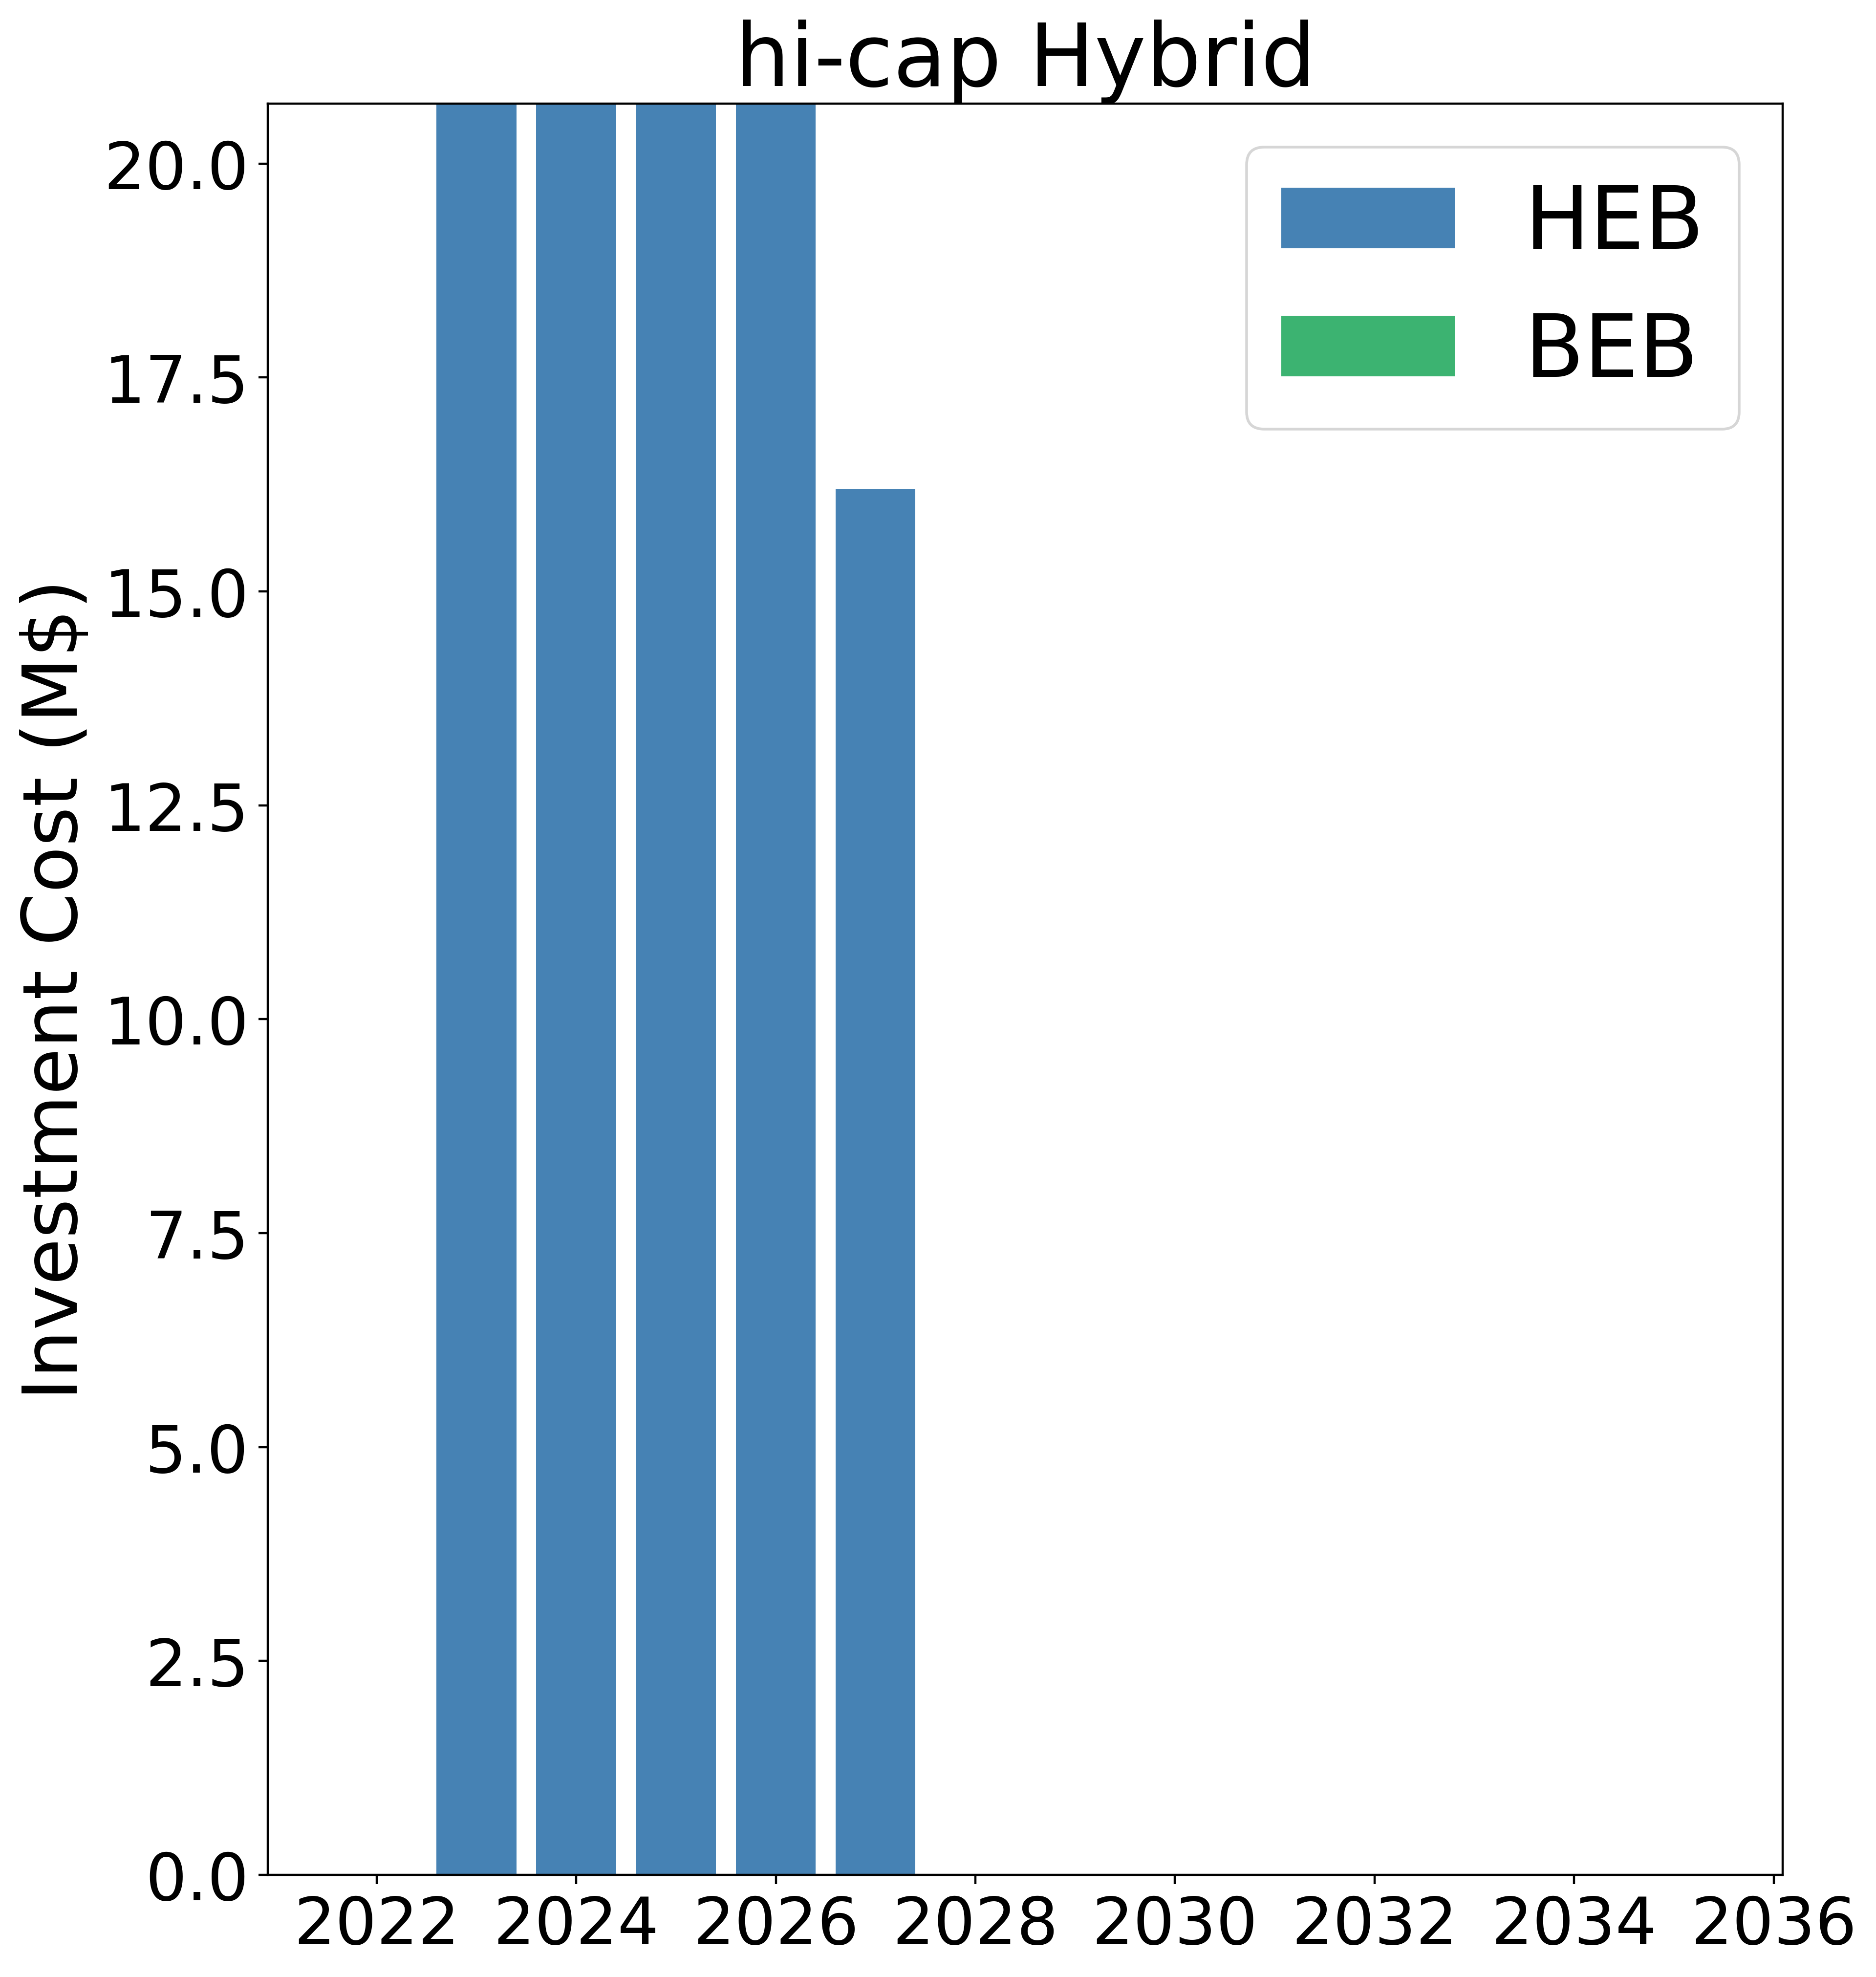

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the color palette
palette = {
    'HEB': 'steelblue',
    'BEB': 'mediumseagreen'
}

# Filter the dataframe for 'hi-cap Hybrid Electric' future
hi_cap_hybrid_electric = merged_df.loc[merged_df['future'] == 'hi-cap Hybrid']

# Create a stacked bar plot with the desired figure size and DPI
plt.figure(figsize=(10, 12), dpi=400)
plt.bar(hi_cap_hybrid_electric['Year'], hi_cap_hybrid_electric['HEB - Investment Cost (M$)'],
        color=palette['HEB'], label='HEB')
plt.bar(hi_cap_hybrid_electric['Year'], hi_cap_hybrid_electric['BEB - Investment Cost (M$)'],
        bottom=hi_cap_hybrid_electric['HEB - Investment Cost (M$)'],
        color=palette['BEB'], label='BEB')

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Adding labels and title
#plt.xlabel('Year', fontsize=28)
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('hi-cap Hybrid', fontsize=32)
plt.legend(fontsize=32)

# Show the plot
plt.show()
